In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
import warnings
from datetime import date, datetime, timedelta

warnings.filterwarnings("ignore")

from matplotlib.legend_handler import HandlerBase

class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]

In [263]:
def dataplot(ticker):
    
    # import SP500 data
    start = '2006-12-31'
    end = '2022-11-30'
    data = yf.download(ticker, start, end)
    data['return'] =np.log(data['Adj Close']).diff().to_numpy()
    data.dropna(inplace = True)
    data.reset_index(inplace=True)
    
    fig,ax=plt.subplots(1,1, figsize = (10,5))
    data['return'].plot(title=ticker+' Daily Log-Return')
    fig.savefig('results/'+ticker+'_dailyret.png')
    
    fig,ax=plt.subplots(1,1, figsize = (10,5))
    ax.plot(data['Date'],data['return'].cumsum())
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.set_title(ticker+' Cumulative Log-Return')
    ax.grid()
    fig.savefig('results/'+ticker+'_cumret.png')
    
    fig,ax=plt.subplots(1,1)
    ax = data['return'].plot.kde()
    ax.set_title(ticker+' Log-Return Distribution')
    ax.grid()
    fig.savefig('results/'+ticker+'_kde.png')   
    
    return data.agg({"return": ["n","min", "max", "median","mean","std","skew","kurtosis"],})

[*********************100%***********************]  1 of 1 completed


AttributeError: 'n' is not a valid function for 'Series' object

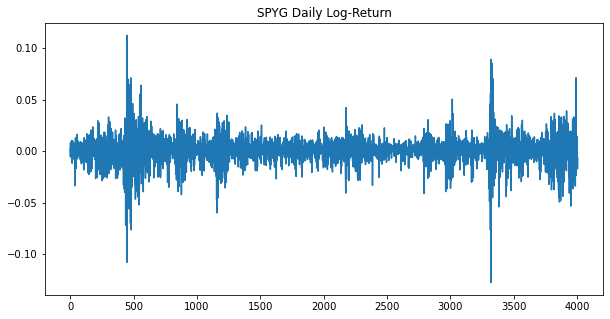

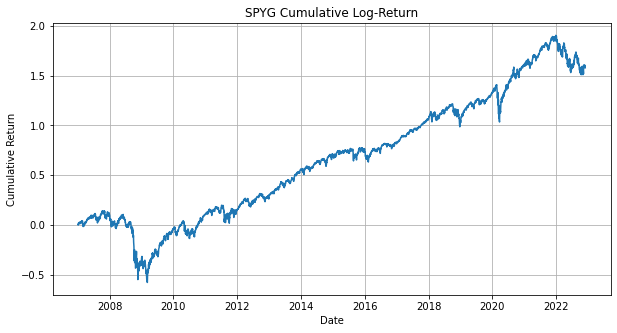

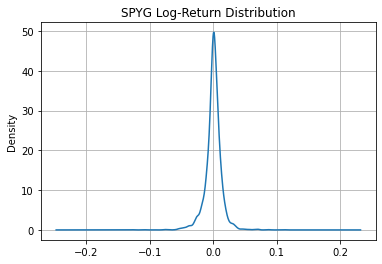

In [264]:
spyg=dataplot('SPYG')

[*********************100%***********************]  1 of 1 completed


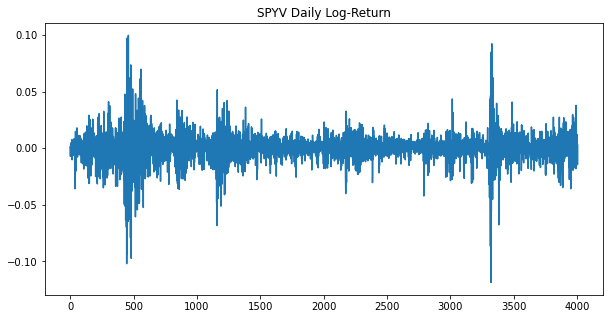

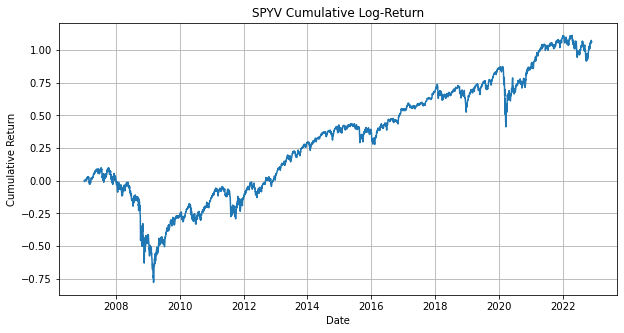

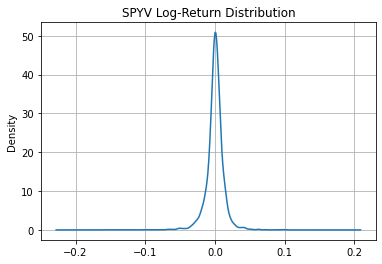

In [254]:
spyv=dataplot('SPYV')

[*********************100%***********************]  1 of 1 completed


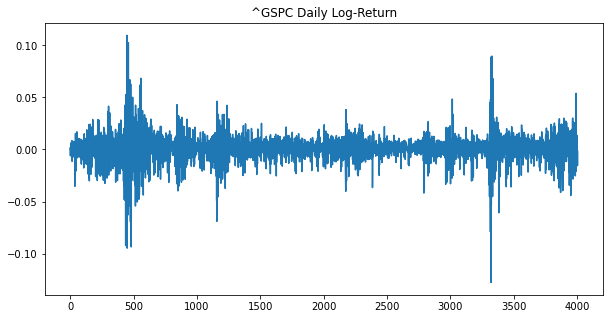

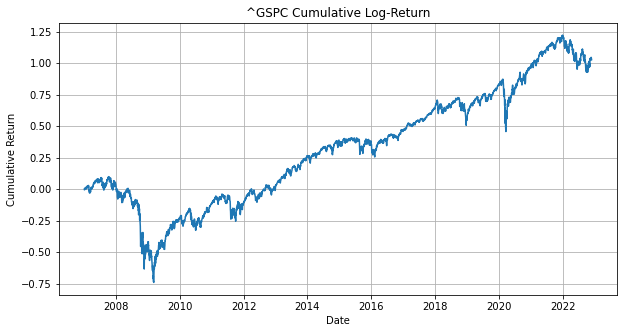

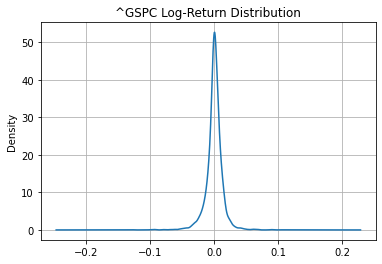

In [255]:
spy=dataplot('^GSPC')

[*********************100%***********************]  1 of 1 completed


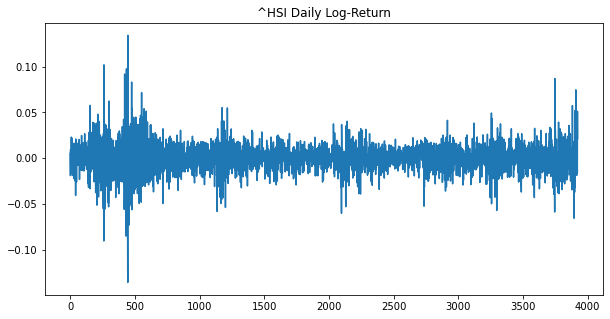

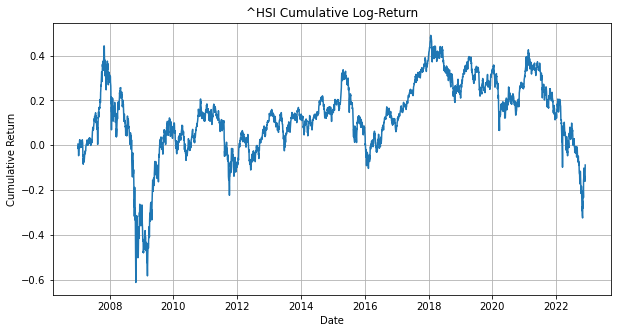

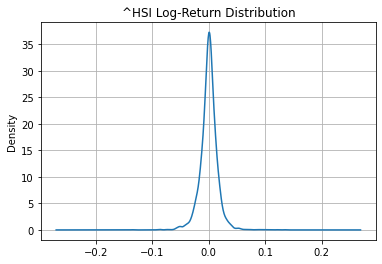

In [256]:
hsi=dataplot('^HSI')

In [262]:
spyv

,return
min,-0.118598
max,0.099824
median,0.000736
mean,0.000265
std,0.012889
skew,-0.647434
kurtosis,12.230254


[*********************100%***********************]  1 of 1 completed


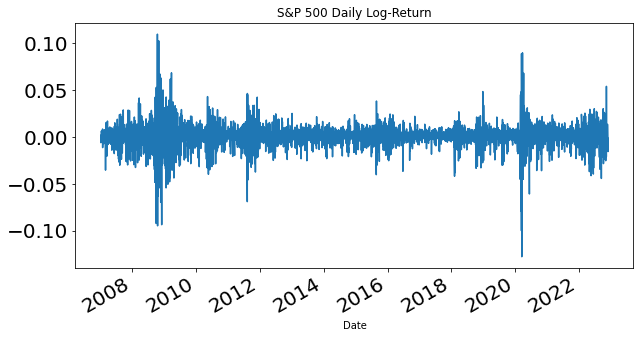

In [239]:
# import SP500 data
start = '2006-12-31'
end = '2022-11-30'
data = yf.download('^GSPC', start, end)
#data = yf.download('PFE', start, end)
data['return'] =np.log(data['Adj Close']).diff().to_numpy()
data.dropna(inplace = True)
fig,ax=plt.subplots(1,1, figsize = (10,5))
data['return'].plot(title='S&P 500 Daily Log-Return')

fig.savefig('results/sp500_dailyret.png')
#data.reset_index(inplace=True)
#data.to_csv('sp500_dailyret.csv', index=False) 

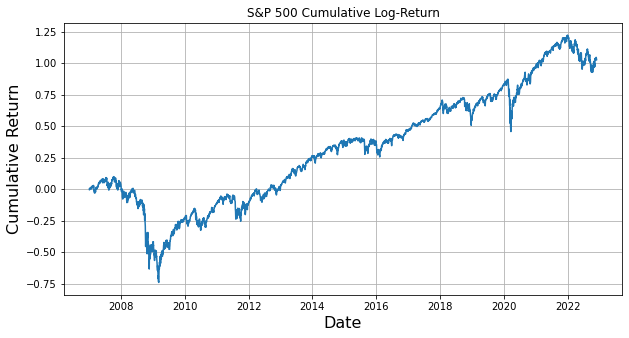

In [212]:
data.reset_index(inplace=True)
fig,ax=plt.subplots(1,1, figsize = (10,5))
ax.plot(data['Date'],data['return'].cumsum())
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Cumulative Return',fontsize=20)
ax.set_title("S&P 500 Cumulative Log-Return",fontsize=20)
ax.grid()
fig.savefig('results/sp500_cumret.png')

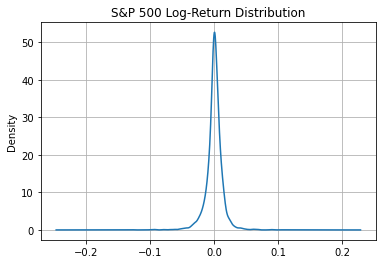

In [215]:
fig,ax=plt.subplots(1,1)
ax = data['return'].plot.kde()
ax.set_title("S&P 500 Log-Return Distribution")
ax.grid()
fig.savefig('results/sp500_kde.png')

In [214]:
data['return'].describe()

count    4005.000000
mean        0.000257
std         0.013031
min        -0.127652
25%        -0.004271
50%         0.000690
75%         0.005970
max         0.109572
Name: return, dtype: float64

In [216]:
data['return'].skew()

-0.5203641768171494

In [218]:
data['return'].kurtosis()

11.88980439740659

[*********************100%***********************]  1 of 1 completed


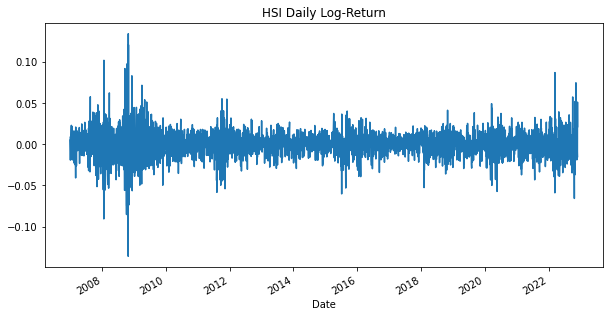

In [240]:
# import SP500 data
start = '2006-12-31'
end = '2022-11-30'
data = yf.download('^HSI', start, end)
#data = yf.download('PFE', start, end)
data['return'] =np.log(data['Adj Close']).diff().to_numpy()
data.dropna(inplace = True)
fig,ax=plt.subplots(1,1, figsize = (10,5))
data['return'].plot(title='HSI Daily Log-Return')
fig.savefig('results/hsi_dailyret.png')
#data.reset_index(inplace=True)
#data.to_csv('sp500_dailyret.csv', index=False) 

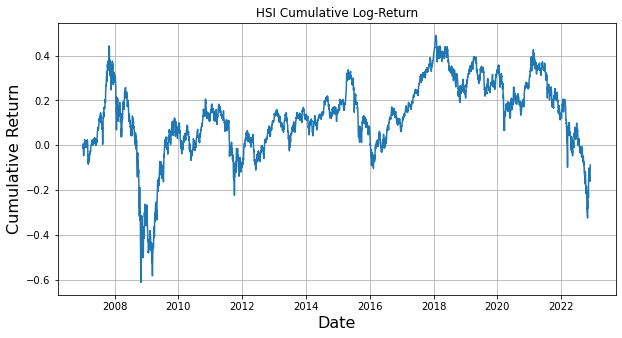

In [222]:
data.reset_index(inplace=True)
fig,ax=plt.subplots(1,1, figsize = (10,5))
ax.plot(data['Date'],data['return'].cumsum())
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Cumulative Return',fontsize=16)
ax.set_title("HSI Cumulative Log-Return")
ax.grid()
fig.savefig('results/hsi_cumret.png')

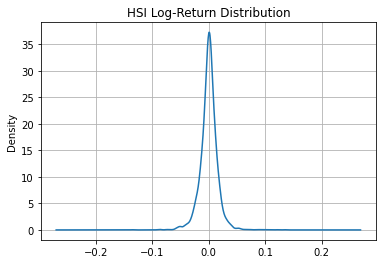

In [223]:
fig,ax=plt.subplots(1,1)
ax = data['return'].plot.kde()
ax.set_title("HSI Log-Return Distribution")
ax.grid()
fig.savefig('results/hsi_kde.png')

In [241]:
data['return'].describe()

count    3922.000000
mean       -0.000022
std         0.015473
min        -0.135820
25%        -0.007209
50%         0.000442
75%         0.007656
max         0.134068
Name: return, dtype: float64

In [224]:
data['return'].skew()

0.06570460495700378

In [225]:
data['return'].kurtosis()

7.69383112207695

In [2]:
# mle estimate with unknown mean and sd
def mle(sample):
    def gaussian(params):
        mean = params[0]   
        sd = params[1]

        nll = -np.sum(stats.norm.logpdf(sample, loc=mean, scale=sd))

        return nll

    initParams = [1, 1]
    
    results = minimize(gaussian, initParams, method='Nelder-Mead')
    
    return results.x

In [3]:
# mle estimate with known mean and unknown sd
def mle_sigma(sample,mu):
    def gaussian(params):
        mean = mu   
        sd = params
        nll = -np.sum(stats.norm.logpdf(sample, loc=mean, scale=sd))
        return nll
    initParams = 1
    
    results = minimize(gaussian, initParams, method='Nelder-Mead')

    return results.x[0]

In [4]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [5]:
def prev_weekday(adate):
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

In [7]:
def get_data(end,window,ticker):
    end=end+timedelta(days=1)
    start = end - timedelta(days=window)
    start = datetime.strptime(str(start)[:10], "%Y-%m-%d")
    data = yf.download(ticker, start, end, progress=False) #data until yesterday -> if i found yesterday had a shift in distribution, then i trade today at yesterday's adjusted close
    # Calculate log returns
    data['return'] =np.log(data['Adj Close']).diff().to_numpy()
    data.dropna(inplace = True) 
    return data

In [161]:
def CUSUM_Trading(ticker,cumu_return, date, trade_history, window, a1, a2, W1, W2):   

  # 1. Get today's data: (-window,0) 
  # window is number of days
    today = date
    #print("today: ",today) 2020-12-31
    data = get_data(today, window, ticker)   
    #print(data.index[-1]) 2020-12-30
    rf_y = yf.download('^IRX', today, progress = False)['Close'].values[-1]

  # 2. Calculate CUSUM until today
  # 2.1 Get base distribution
  # if it is the first day trading, use yesterday's window (-366, -1) as f0 
  # because it is the distribution of return, so we have different W for sell-then-hold-cash (W2) and short (W3)
  
    if len(trade_history)==0:
               
        base = prev_weekday(today)
        tmp=get_data(base,500,ticker) # 500, make sure to get at least 1 year data
        data_base=tmp.iloc[-window:,:] 
        X0 = data_base['return'].values[-1]  
        
        calibrate_df0 = data_base['return'] 
        mu0,sigma0 = mle(calibrate_df0)
        f0 = normpdf(X0, mu0-sigma0**2/2, sigma0)

        W1, W2  = [0], [0]

  # if not, then use the previous trading day's distribution as base distribution (or should we calibrate the real dist at our trading day)
    else:
        #print(trade_history)
        mu0 = trade_history['mu'].values[-1]
        sigma0 = trade_history['sigma'].values[-1]
        f0 = trade_history['f'].values[-1]
        
    #print("mu0: ",mu0)
    #print("sigma0: ",sigma0)
    #print('f0: ',f0)

  # 2.2 Get today's(yesterday's) distribution
    mu1=mu0
    mu2=mu0
    
    # h1: long threshold, h2: short threshold
    h1=mu1+a1*sigma0
    h2=mu2-a2*sigma0
    #print("h1: ",h1)
    #print("h2: ",h2)

    sigma1=sigma0
    sigma2=sigma0
  
    X = data['return'][-1]
    #print("X: ",X)
    f1=normpdf(X, mu1, sigma1)
    #print("f1: ",f1)
    f2=normpdf(X, mu2, sigma2)
    #print("f2: ",f2)

  # 2.3 Get CUSUM until today(yesterday)
    W1_t = max(W1[-1]+np.log(f1/f0),0) #f1>f0?
    W2_t = min(W2[-1]+np.log(f2/f0),0) #f0<f2?
    #print("W1_t: ",W1_t)
    #print("W2_t: ",W2_t)

  # 2.4 Detect if there is a signal
  # use yeaterday's adjusted close to buy or sell will result today's return = 0 so cumu_return not affected
  # if signals of same direction happen one after another, hold, but recored in trade history and renew distribution for next day
    if len(trade_history)==0:
        cumu_return += rf_y/360/100  #13 Week Treasury Bill yield per day as rf 
    else:
        trade_direction = trade_history['Direction'].values[-1]
        #print(trade_direction)
        if trade_direction == 0:
            cumu_return += rf_y/360/100
        else:
            cumu_return += trade_direction * data['return'].values[-1]

    if W1_t >= h1 and W2_t > h2:
        #buy + long
        if len(trade_history)==0 :
            print(today,'Long Signal: Long at', {data['Adj Close'][-1]})
            trade_data = {'Date': today, 'Action': 'long', 'Direction': 1, 'mu':mu1, 'sigma':sigma1, 'f':f1, 'Price': data['Adj Close'][-1]}
        else:

            #print(trade_history['Direction'].to_list()[-1])
            if trade_history['Direction'].to_list()[-1] != 1:
                print(today,'Long Signal: Long at', {data['Adj Close'][-1]})
                trade_data = {'Date': today, 'Action': 'long', 'Direction': 1, 'mu':mu1, 'sigma':sigma1, 'f':f1, 'Price': data['Adj Close'][-1]}
            elif trade_history['Direction'].to_list()[-1] == 1:
                print(today,'Long Signal: Hold at', {data['Adj Close'][-1]})
                trade_data = {'Date': today, 'Action': 'hold', 'Direction': 1, 'mu':mu1, 'sigma':sigma1, 'f':f1, 'Price': data['Adj Close'][-1]}
        trade_history = trade_history.append(trade_data, ignore_index = True)
        
        W1, W2  = [0], [0]

    elif W1_t < h1 and W2_t <= h2:
        # sell
        if len(trade_history)==0:
            print(today,'Short Signal: Short at', {data['Adj Close'][-1]})
            trade_data = {'Date': today, 'Action': 'short', 'Direction': -1, 'mu':mu2, 'sigma':sigma2, 'f':f2, 'Price': data['Adj Close'][-1]}
        else:
            if trade_history['Direction'].to_list()[-1] != -1:
                print(today,'Short Signal: Short at', {data['Adj Close'][-1]})
                trade_data = {'Date': today, 'Action': 'short', 'Direction': -1, 'mu':mu2, 'sigma':sigma2, 'f':f2, 'Price': data['Adj Close'][-1]}
            elif trade_history['Direction'].to_list()[-1] == -1:
                print(today, 'Short Signal: Hold at' , {data['Adj Close'][-1]})
                trade_data = {'Date': today, 'Action': 'hold', 'Direction': -1, 'mu':mu2, 'sigma':sigma2, 'f':f2, 'Price': data['Adj Close'][-1]}
        trade_history = trade_history.append(trade_data, ignore_index = True)

        W1, W2  = [0], [0]
            
    #print("Return: ", cumu_return)
    return cumu_return, trade_history, W1, W2, W1_t, W2_t

In [8]:
def np64_to_datetime(d):
    ts = (d - np.datetime64('1969-12-31T00:00:00Z')) / np.timedelta64(1, 's')
    d = datetime.fromtimestamp(ts).date()
    return d

In [300]:
def cusum_strategy(period,window,ticker):

    start = '2006-12-31'
    end = '2022-11-30'
    data = yf.download(ticker, start, end)
    data['return'] =np.log(data['Adj Close']).diff().to_numpy()
    data.dropna(inplace = True)
    data.reset_index(inplace=True)
    
    df=data.iloc[-period:,:]
    
    i = 0
    try_date_list = df['Date'].values
    trade_history = pd.DataFrame(columns=['Date', 'Action', 'Direction', 'mu', 'sigma', 'f', 'Price'])
    W1, W2 = [0], [0]
    cumu_return=0
    W1_list=[]
    W2_list=[]
    return_list=[]
    while i < len(try_date_list):
        the_date = np64_to_datetime(try_date_list[i])
        #print("the date: ",the_date)
        cumu_return, trade_history, W1, W2, W1_t, W2_t = CUSUM_Trading(ticker,cumu_return, the_date, trade_history, window, 1, 1, W1, W2)
        i += 1
        W1_list.append(W1_t)
        W2_list.append(W2_t)
        return_list.append(cumu_return)
    
    trade_history['Date']=pd.to_datetime(trade_history['Date'])
    plot=pd.merge(df,trade_history, how='outer', on='Date').iloc[-period:,]

    fig,ax=plt.subplots(1,1, figsize = (10,5))
    ax.plot(plot['Date'], plot['Adj Close'])
    ax.plot(plot['Date'].loc[plot['Action']=='short'], plot['Adj Close'].loc[plot['Action']=='short'], 'v', markersize=5, color='g',label='short')
    ax.plot(plot['Date'].loc[plot['Action']=='long'], plot['Adj Close'].loc[plot['Action']=='long'], '^', markersize=5, color='r',label='long')
    ax.set_xlabel('Date',fontsize=16)
    ax.set_ylabel('S&P500 Adj Close',fontsize=16)
    ax.set_title("CUSUM Trading Signals"+", window="+str(window),fontsize=20)
    ax.grid()
    list_color  = ["g", "r"]
    list_mak    = ["v","^"]
    list_lab    = ['short','long']
    ax.legend(list(zip(list_color,list_mak)), list_lab, 
              handler_map={tuple:MarkerHandler()}) 
    fig.savefig('results/signal-'+str(period)+'-'+str(window)+'-'+ticker+'.png')
    
    fig,ax=plt.subplots(1,1, figsize = (10,5))
    ax.plot(plot['Date'][-period:],return_list[-period:],label='CUSUM')
    ax.plot(plot['Date'][-period:],plot['return'][-period:].cumsum(),label='Long-and-hold')
    ax.set_xlabel('Date',fontsize=16)
    ax.set_ylabel('Cumulative Return',fontsize=16)
    ax.set_title("CUSUM vs Long-and-hold"+", window="+str(window),fontsize=20)
    ax.legend()
    ax.grid()
    fig.savefig('results/return-'+str(period)+'-'+str(window)+'-'+ticker+'.png')
    
    fig,(ax1,ax2)=plt.subplots(2,1, figsize = (10,10))
    ax1.plot(df['Date'][-period:],W1_list[-period:])
    ax2.plot(df['Date'][-period:],W2_list[-period:])
    ax1.set_xlabel('Date',fontsize=16)
    ax1.set_ylabel('the up-sided CUSUM',fontsize=16)
    ax1.grid()
    ax2.set_xlabel('Date',fontsize=16)
    ax2.set_ylabel('the down-sided CUSUM',fontsize=16)
    ax2.grid()
    ax1.set_title("CUSUM statistic for "+r"$\ln{S_t/S_{t-1}}$"+", window="+str(window),fontsize=20)
    fig.savefig('results/cusum-'+str(period)+'-'+str(window)+'-'+ticker+'.png')
    
    return plot,return_list

[*********************100%***********************]  1 of 1 completed
2007-01-04 Short Signal: Short at {10.94168758392334}
2007-01-05 Short Signal: Hold at {10.880528450012207}
2007-01-08 Long Signal: Long at {10.91314697265625}
2007-01-09 Short Signal: Short at {10.900915145874023}
2007-01-10 Short Signal: Hold at {10.966155052185059}
2007-01-11 Short Signal: Hold at {11.06605339050293}
2007-01-12 Long Signal: Long at {11.12516975402832}
2007-01-16 Long Signal: Hold at {11.131285667419434}
2007-01-17 Short Signal: Short at {11.108864784240723}
2007-01-18 Short Signal: Hold at {11.06605052947998}
2007-01-19 Long Signal: Long at {11.11090087890625}
2007-01-22 Short Signal: Short at {11.02527904510498}
2007-01-23 Long Signal: Long at {11.059934616088867}
2007-01-24 Short Signal: Short at {11.174103736877441}
2007-01-25 Short Signal: Hold at {11.043625831604004}
2007-01-26 Long Signal: Long at {11.021202087402344}
2007-01-29 Long Signal: Hold at {11.023237228393555}
2007-01-30 Short Signa

2007-08-16 Long Signal: Hold at {11.09587287902832}
2007-08-17 Short Signal: Short at {11.274008750915527}
2007-08-20 Long Signal: Long at {11.300628662109375}
2007-08-21 Short Signal: Short at {11.341577529907227}
2007-08-22 Short Signal: Hold at {11.480815887451172}
2007-08-23 Long Signal: Long at {11.462386131286621}
2007-08-24 Short Signal: Short at {11.607767105102539}
2007-08-27 Long Signal: Long at {11.538146018981934}
2007-08-28 Short Signal: Short at {11.310864448547363}
2007-08-29 Long Signal: Long at {11.546338081359863}
2007-08-30 Long Signal: Hold at {11.538146018981934}
2007-08-31 Short Signal: Short at {11.6650972366333}
2007-09-04 Short Signal: Hold at {11.798192024230957}
2007-09-05 Long Signal: Long at {11.691717147827148}
2007-09-06 Long Signal: Hold at {11.742904663085938}
2007-09-07 Short Signal: Short at {11.542242050170898}
2007-09-10 Long Signal: Long at {11.532002449035645}
2007-09-11 Short Signal: Short at {11.681479454040527}
2007-09-12 Long Signal: Long at {

2008-03-28 Long Signal: Long at {10.798336029052734}
2008-03-31 Long Signal: Hold at {10.878687858581543}
2008-04-01 Short Signal: Short at {11.195982933044434}
2008-04-02 Long Signal: Long at {11.218645095825195}
2008-04-04 Short Signal: Short at {11.331965446472168}
2008-04-07 Long Signal: Long at {11.272215843200684}
2008-04-08 Long Signal: Hold at {11.294882774353027}
2008-04-09 Short Signal: Short at {11.163019180297852}
2008-04-10 Long Signal: Long at {11.270156860351562}
2008-04-11 Short Signal: Short at {11.07029914855957}
2008-04-14 Long Signal: Long at {11.047635078430176}
2008-04-15 Long Signal: Hold at {11.078542709350586}
2008-04-16 Short Signal: Short at {11.323725700378418}
2008-04-17 Long Signal: Long at {11.371112823486328}
2008-04-18 Short Signal: Short at {11.538002967834473}
2008-04-21 Long Signal: Long at {11.605997085571289}
2008-04-22 Short Signal: Short at {11.449407577514648}
2008-04-23 Long Signal: Long at {11.529760360717773}
2008-04-24 Long Signal: Hold at {

2008-11-06 Long Signal: Long at {7.519267559051514}
2008-11-07 Long Signal: Hold at {7.7592878341674805}
2008-11-10 Long Signal: Hold at {7.67445182800293}
2008-11-11 Short Signal: Short at {7.461328983306885}
2008-11-12 Short Signal: Hold at {7.113714218139648}
2008-11-13 Short Signal: Hold at {7.587547302246094}
2008-11-14 Long Signal: Long at {7.308216094970703}
2008-11-17 Long Signal: Hold at {7.124059677124023}
2008-11-18 Long Signal: Hold at {7.095090866088867}
2008-11-19 Short Signal: Short at {6.737129211425781}
2008-11-20 Short Signal: Hold at {6.281919002532959}
2008-11-21 Long Signal: Long at {6.5902204513549805}
2008-11-24 Short Signal: Short at {7.076469898223877}
2008-11-25 Long Signal: Long at {7.057846546173096}
2008-11-26 Short Signal: Short at {7.343390464782715}
2008-11-28 Long Signal: Long at {7.386841773986816}
2008-12-01 Short Signal: Short at {6.842655181884766}
2008-12-02 Long Signal: Long at {6.896453380584717}
2008-12-03 Short Signal: Short at {7.1716518402099

2009-06-23 Long Signal: Long at {8.031728744506836}
2009-06-24 Short Signal: Short at {8.125846862792969}
2009-06-25 Short Signal: Hold at {8.291085243225098}
2009-06-26 Long Signal: Long at {8.28899097442627}
2009-06-29 Short Signal: Short at {8.35383415222168}
2009-06-30 Short Signal: Hold at {8.303633689880371}
2009-07-01 Long Signal: Long at {8.314091682434082}
2009-07-02 Short Signal: Short at {8.115389823913574}
2009-07-06 Long Signal: Long at {8.065193176269531}
2009-07-07 Short Signal: Short at {7.902047157287598}
2009-07-08 Long Signal: Long at {7.922962188720703}
2009-07-09 Short Signal: Short at {7.95224666595459}
2009-07-10 Long Signal: Long at {7.950153827667236}
2009-07-13 Short Signal: Short at {8.102840423583984}
2009-07-14 Long Signal: Long at {8.157219886779785}
2009-07-15 Short Signal: Short at {8.39775276184082}
2009-07-16 Long Signal: Long at {8.489787101745605}
2009-07-17 Long Signal: Hold at {8.516976356506348}
2009-07-20 Short Signal: Short at {8.625738143920898

2010-02-08 Short Signal: Short at {9.784740447998047}
2010-02-09 Short Signal: Hold at {9.90660572052002}
2010-02-10 Long Signal: Long at {9.864582061767578}
2010-02-11 Short Signal: Short at {10.024263381958008}
2010-02-12 Long Signal: Long at {10.00745677947998}
2010-02-16 Short Signal: Short at {10.154529571533203}
2010-02-17 Long Signal: Long at {10.200757026672363}
2010-02-18 Short Signal: Short at {10.299507141113281}
2010-02-19 Long Signal: Long at {10.316313743591309}
2010-02-22 Short Signal: Short at {10.284796714782715}
2010-02-23 Short Signal: Hold at {10.17343807220459}
2010-02-24 Long Signal: Long at {10.240677833557129}
2010-02-25 Long Signal: Hold at {10.25118350982666}
2010-02-26 Short Signal: Short at {10.276394844055176}
2010-03-01 Short Signal: Hold at {10.417167663574219}
2010-03-02 Long Signal: Long at {10.436075210571289}
2010-03-03 Short Signal: Short at {10.47179889678955}
2010-03-04 Long Signal: Long at {10.492807388305664}
2010-03-05 Short Signal: Short at {10

2010-09-23 Short Signal: Short at {10.545730590820312}
2010-09-24 Short Signal: Hold at {10.786603927612305}
2010-09-27 Long Signal: Long at {10.738006591796875}
2010-09-28 Long Signal: Hold at {10.795059204101562}
2010-09-29 Long Signal: Hold at {10.784492492675781}
2010-09-30 Long Signal: Hold at {10.797168731689453}
2010-10-01 Short Signal: Short at {10.792947769165039}
2010-10-04 Short Signal: Hold at {10.67673110961914}
2010-10-05 Short Signal: Hold at {10.921833992004395}
2010-10-06 Long Signal: Long at {10.86267375946045}
2010-10-07 Long Signal: Hold at {10.852108001708984}
2010-10-08 Short Signal: Short at {10.940852165222168}
2010-10-11 Long Signal: Long at {10.945076942443848}
2010-10-12 Short Signal: Short at {11.008468627929688}
2010-10-13 Short Signal: Hold at {11.111998558044434}
2010-10-14 Long Signal: Long at {11.076081275939941}
2010-10-15 Short Signal: Short at {11.160599708557129}
2010-10-18 Long Signal: Long at {11.207083702087402}
2010-10-19 Short Signal: Short at 

2011-05-09 Short Signal: Short at {12.941685676574707}
2011-05-10 Short Signal: Hold at {13.060689926147461}
2011-05-11 Short Signal: Hold at {12.920434951782227}
2011-05-12 Long Signal: Long at {13.013938903808594}
2011-05-13 Short Signal: Short at {12.916184425354004}
2011-05-16 Short Signal: Hold at {12.814181327819824}
2011-05-17 Long Signal: Long at {12.788681030273438}
2011-05-18 Short Signal: Short at {12.922562599182129}
2011-05-19 Long Signal: Long at {12.941686630249023}
2011-05-20 Short Signal: Short at {12.865184783935547}
2011-05-23 Short Signal: Hold at {12.729179382324219}
2011-05-24 Long Signal: Long at {12.73768138885498}
2011-05-25 Short Signal: Short at {12.782305717468262}
2011-05-26 Short Signal: Hold at {12.83755874633789}
2011-05-27 Long Signal: Long at {12.854559898376465}
2011-05-31 Short Signal: Short at {12.945932388305664}
2011-06-01 Short Signal: Hold at {12.761053085327148}
2011-06-02 Long Signal: Long at {12.741931915283203}
2011-06-03 Short Signal: Short

2011-12-16 Short Signal: Short at {12.204901695251465}
2011-12-19 Short Signal: Hold at {12.114459991455078}
2011-12-20 Short Signal: Hold at {12.463297843933105}
2011-12-21 Long Signal: Long at {12.424539566040039}
2011-12-22 Short Signal: Short at {12.512822151184082}
2011-12-23 Short Signal: Hold at {12.607566833496094}
2011-12-27 Long Signal: Long at {12.648479461669922}
2011-12-28 Short Signal: Short at {12.51497745513916}
2011-12-29 Long Signal: Long at {12.62048625946045}
2011-12-30 Long Signal: Hold at {12.590341567993164}
2012-01-03 Short Signal: Short at {12.730302810668945}
2012-01-04 Long Signal: Long at {12.719539642333984}
2012-01-05 Long Signal: Hold at {12.741073608398438}
2012-01-06 Short Signal: Short at {12.730305671691895}
2012-01-09 Long Signal: Long at {12.736766815185547}
2012-01-10 Short Signal: Short at {12.81428337097168}
2012-01-11 Long Signal: Long at {12.812126159667969}
2012-01-12 Long Signal: Hold at {12.83366584777832}
2012-01-13 Short Signal: Short at {

2012-07-30 Long Signal: Long at {14.126106262207031}
2012-07-31 Short Signal: Short at {14.08052921295166}
2012-08-01 Short Signal: Hold at {14.017597198486328}
2012-08-02 Short Signal: Hold at {13.937296867370605}
2012-08-03 Short Signal: Hold at {14.167339324951172}
2012-08-06 Long Signal: Long at {14.215088844299316}
2012-08-07 Short Signal: Short at {14.288878440856934}
2012-08-08 Long Signal: Long at {14.262834548950195}
2012-08-09 Long Signal: Hold at {14.27368450164795}
2012-08-16 Short Signal: Short at {14.427769660949707}
2012-08-17 Long Signal: Long at {14.46900463104248}
2012-08-20 Long Signal: Hold at {14.473346710205078}
2012-08-21 Short Signal: Short at {14.395216941833496}
2012-08-22 Long Signal: Long at {14.440792083740234}
2012-08-23 Short Signal: Short at {14.343130111694336}
2012-08-24 Long Signal: Long at {14.410408973693848}
2012-08-27 Long Signal: Hold at {14.432111740112305}
2012-08-28 Short Signal: Short at {14.462495803833008}
2012-08-29 Short Signal: Hold at {

2013-03-21 Short Signal: Hold at {15.44914436340332}
2013-03-22 Long Signal: Long at {15.567951202392578}
2013-03-25 Long Signal: Hold at {15.510749816894531}
2013-03-26 Short Signal: Short at {15.651556015014648}
2013-03-27 Long Signal: Long at {15.642752647399902}
2013-03-28 Short Signal: Short at {15.693351745605469}
2013-04-01 Short Signal: Hold at {15.60095500946045}
2013-04-02 Long Signal: Long at {15.70875358581543}
2013-04-03 Short Signal: Short at {15.548150062561035}
2013-04-04 Long Signal: Long at {15.570145606994629}
2013-04-05 Short Signal: Short at {15.521748542785645}
2013-04-08 Long Signal: Long at {15.559147834777832}
2013-04-09 Short Signal: Short at {15.67575454711914}
2013-04-10 Short Signal: Hold at {15.891365051269531}
2013-04-11 Long Signal: Long at {15.933176040649414}
2013-04-12 Short Signal: Short at {15.904562950134277}
2013-04-15 Short Signal: Hold at {15.625152587890625}
2013-04-16 Long Signal: Long at {15.801170349121094}
2013-04-17 Short Signal: Short at 

2013-11-01 Long Signal: Hold at {18.015626907348633}
2013-11-04 Short Signal: Short at {18.07773208618164}
2013-11-05 Short Signal: Hold at {18.042251586914062}
2013-11-06 Long Signal: Long at {18.07994842529297}
2013-11-07 Short Signal: Short at {17.824893951416016}
2013-11-08 Long Signal: Long at {17.99344825744629}
2013-11-11 Long Signal: Hold at {18.057764053344727}
2013-11-12 Long Signal: Hold at {18.053333282470703}
2013-11-13 Short Signal: Short at {18.197494506835938}
2013-11-14 Long Signal: Long at {18.337217330932617}
2013-11-15 Long Signal: Hold at {18.41263198852539}
2013-11-18 Short Signal: Short at {18.29507827758789}
2013-11-19 Long Signal: Long at {18.244062423706055}
2013-11-20 Short Signal: Short at {18.1731014251709}
2013-11-21 Short Signal: Hold at {18.350528717041016}
2013-11-22 Long Signal: Long at {18.428146362304688}
2013-11-25 Long Signal: Hold at {18.41706085205078}
2013-11-26 Short Signal: Short at {18.507991790771484}
2013-11-27 Long Signal: Long at {18.5323

2014-06-24 Short Signal: Hold at {20.220104217529297}
2014-06-25 Short Signal: Hold at {20.374874114990234}
2014-06-26 Long Signal: Long at {20.345706939697266}
2014-06-27 Long Signal: Hold at {20.40627098083496}
2014-06-30 Long Signal: Hold at {20.39056968688965}
2014-07-01 Short Signal: Short at {20.59467124938965}
2014-07-02 Long Signal: Long at {20.59242820739746}
2014-07-03 Short Signal: Short at {20.706819534301758}
2014-07-07 Short Signal: Hold at {20.623830795288086}
2014-07-08 Short Signal: Hold at {20.464584350585938}
2014-07-09 Long Signal: Long at {20.572250366210938}
2014-07-10 Short Signal: Short at {20.473556518554688}
2014-07-11 Long Signal: Long at {20.511682510375977}
2014-07-14 Short Signal: Short at {20.650747299194336}
2014-07-15 Long Signal: Long at {20.578975677490234}
2014-07-16 Long Signal: Hold at {20.630565643310547}
2014-07-17 Short Signal: Short at {20.3995361328125}
2014-07-18 Long Signal: Long at {20.61934471130371}
2014-07-21 Long Signal: Hold at {20.570

2015-02-10 Short Signal: Short at {22.094587326049805}
2015-02-11 Long Signal: Long at {22.166900634765625}
2015-02-12 Short Signal: Short at {22.372549057006836}
2015-02-13 Long Signal: Long at {22.485544204711914}
2015-02-17 Long Signal: Hold at {22.512664794921875}
2015-02-18 Short Signal: Short at {22.58723258972168}
2015-02-19 Long Signal: Long at {22.57367706298828}
2015-02-20 Short Signal: Short at {22.743162155151367}
2015-02-23 Long Signal: Long at {22.797401428222656}
2015-02-24 Long Signal: Hold at {22.80191993713379}
2015-02-25 Short Signal: Short at {22.79062843322754}
2015-02-26 Long Signal: Long at {22.829036712646484}
2015-02-27 Short Signal: Short at {22.747682571411133}
2015-03-02 Short Signal: Hold at {22.93073272705078}
2015-03-03 Long Signal: Long at {22.806440353393555}
2015-03-04 Long Signal: Hold at {22.716041564941406}
2015-03-05 Long Signal: Hold at {22.76576042175293}
2015-03-06 Short Signal: Short at {22.429048538208008}
2015-03-09 Long Signal: Long at {22.5

2015-09-22 Short Signal: Short at {21.70557975769043}
2015-09-23 Long Signal: Long at {21.682723999023438}
2015-09-24 Short Signal: Short at {21.586769104003906}
2015-09-25 Long Signal: Long at {21.509078979492188}
2015-09-28 Short Signal: Short at {20.901323318481445}
2015-09-29 Long Signal: Long at {20.905899047851562}
2015-09-30 Short Signal: Short at {21.30345344543457}
2015-10-01 Long Signal: Long at {21.31715965270996}
2015-10-02 Short Signal: Short at {21.739849090576172}
2015-10-05 Long Signal: Long at {22.082571029663086}
2015-10-06 Long Signal: Hold at {21.94548225402832}
2015-10-07 Long Signal: Hold at {22.10997772216797}
2015-10-08 Short Signal: Short at {22.28820037841797}
2015-10-09 Long Signal: Long at {22.356740951538086}
2015-10-12 Long Signal: Hold at {22.40700912475586}
2015-10-13 Short Signal: Short at {22.25621223449707}
2015-10-14 Long Signal: Long at {22.151107788085938}
2015-10-15 Short Signal: Short at {22.47783660888672}
2015-10-16 Long Signal: Long at {22.546

2016-05-05 Long Signal: Hold at {22.762252807617188}
2016-05-06 Short Signal: Short at {22.879762649536133}
2016-05-09 Long Signal: Long at {22.939668655395508}
2016-05-10 Short Signal: Short at {23.243810653686523}
2016-05-11 Long Signal: Long at {23.02031135559082}
2016-05-12 Long Signal: Hold at {22.967317581176758}
2016-05-13 Short Signal: Short at {22.863637924194336}
2016-05-16 Short Signal: Hold at {23.080217361450195}
2016-05-17 Short Signal: Hold at {22.80833625793457}
2016-05-18 Long Signal: Long at {22.799114227294922}
2016-05-19 Short Signal: Short at {22.700040817260742}
2016-05-20 Long Signal: Long at {22.829076766967773}
2016-05-23 Long Signal: Hold at {22.80142593383789}
2016-05-24 Short Signal: Short at {23.170074462890625}
2016-05-25 Long Signal: Long at {23.29680824279785}
2016-05-26 Long Signal: Hold at {23.329063415527344}
2016-05-27 Short Signal: Short at {23.423532485961914}
2016-05-31 Long Signal: Long at {23.414318084716797}
2016-06-01 Long Signal: Hold at {23.

2016-12-16 Short Signal: Short at {24.69841957092285}
2016-12-19 Long Signal: Long at {24.83837127685547}
2016-12-20 Long Signal: Hold at {24.922334671020508}
2016-12-21 Short Signal: Short at {24.8616943359375}
2016-12-22 Short Signal: Hold at {24.77773094177246}
2016-12-23 Long Signal: Long at {24.8197078704834}
2016-12-27 Short Signal: Short at {24.9060115814209}
2016-12-28 Short Signal: Hold at {24.682092666625977}
2016-12-29 Long Signal: Long at {24.72174644470215}
2016-12-30 Short Signal: Short at {24.56780242919922}
2017-01-03 Long Signal: Long at {24.731077194213867}
2017-01-04 Long Signal: Hold at {24.871023178100586}
2017-01-05 Long Signal: Hold at {24.9270076751709}
2017-01-06 Short Signal: Short at {25.10893440246582}
2017-01-09 Long Signal: Long at {25.052963256835938}
2017-01-10 Long Signal: Hold at {25.064619064331055}
2017-01-12 Short Signal: Short at {25.078609466552734}
2017-01-13 Long Signal: Long at {25.127599716186523}
2017-01-17 Short Signal: Short at {25.07161903

2017-08-14 Short Signal: Short at {28.60239028930664}
2017-08-15 Long Signal: Long at {28.61648941040039}
2017-08-16 Short Signal: Short at {28.684621810913086}
2017-08-17 Short Signal: Hold at {28.212383270263672}
2017-08-18 Long Signal: Long at {28.165388107299805}
2017-08-21 Long Signal: Hold at {28.2147274017334}
2017-08-22 Short Signal: Short at {28.54130744934082}
2017-08-23 Long Signal: Long at {28.440277099609375}
2017-08-24 Long Signal: Hold at {28.383892059326172}
2017-08-25 Long Signal: Hold at {28.388586044311523}
2017-08-29 Short Signal: Short at {28.524860382080078}
2017-08-30 Short Signal: Hold at {28.691673278808594}
2017-08-31 Short Signal: Hold at {28.910171508789062}
2017-09-01 Long Signal: Long at {28.936016082763672}
2017-09-05 Short Signal: Short at {28.755102157592773}
2017-09-06 Long Signal: Long at {28.832637786865234}
2017-09-07 Short Signal: Short at {28.93131446838379}
2017-09-08 Short Signal: Hold at {28.830289840698242}
2017-09-11 Short Signal: Hold at {29

2018-04-06 Short Signal: Short at {31.28156089782715}
2018-04-09 Long Signal: Long at {31.424057006835938}
2018-04-10 Short Signal: Short at {31.984521865844727}
2018-04-11 Long Signal: Long at {31.80402946472168}
2018-04-12 Short Signal: Short at {32.0985107421875}
2018-04-13 Long Signal: Long at {32.003517150878906}
2018-04-16 Short Signal: Short at {32.25050354003906}
2018-04-17 Short Signal: Hold at {32.782466888427734}
2018-04-18 Long Signal: Long at {32.839473724365234}
2018-04-19 Short Signal: Short at {32.54499435424805}
2018-04-20 Short Signal: Hold at {32.18400955200195}
2018-04-23 Long Signal: Long at {32.14601135253906}
2018-04-24 Short Signal: Short at {31.519041061401367}
2018-04-25 Long Signal: Long at {31.57604217529297}
2018-04-26 Short Signal: Short at {32.08900833129883}
2018-04-27 Long Signal: Long at {32.136512756347656}
2018-04-30 Short Signal: Short at {31.90852165222168}
2018-05-01 Long Signal: Long at {32.11750793457031}
2018-05-02 Short Signal: Short at {31.95

2018-11-19 Short Signal: Short at {32.817649841308594}
2018-11-20 Long Signal: Long at {32.282012939453125}
2018-11-21 Long Signal: Hold at {32.41590881347656}
2018-11-23 Short Signal: Short at {32.23417282104492}
2018-11-26 Short Signal: Hold at {32.808082580566406}
2018-11-27 Long Signal: Long at {32.90373992919922}
2018-11-28 Short Signal: Short at {33.88894271850586}
2018-11-29 Long Signal: Long at {33.812408447265625}
2018-11-30 Short Signal: Short at {34.11849594116211}
2018-12-03 Short Signal: Hold at {34.62544250488281}
2018-12-04 Short Signal: Hold at {33.401119232177734}
2018-12-06 Long Signal: Long at {33.48720169067383}
2018-12-07 Short Signal: Short at {32.54026794433594}
2018-12-10 Long Signal: Long at {32.779388427734375}
2018-12-11 Long Signal: Hold at {32.83677291870117}
2018-12-12 Short Signal: Short at {33.08547592163086}
2018-12-13 Long Signal: Long at {33.08546829223633}
2018-12-14 Short Signal: Short at {32.35852813720703}
2018-12-17 Long Signal: Long at {31.65072

2019-07-11 Long Signal: Long at {38.41059112548828}
2019-07-12 Short Signal: Short at {38.52668762207031}
2019-07-15 Long Signal: Long at {38.5460319519043}
2019-07-16 Short Signal: Short at {38.38154983520508}
2019-07-17 Short Signal: Hold at {38.2074089050293}
2019-07-18 Long Signal: Long at {38.30415344238281}
2019-07-19 Short Signal: Short at {38.062278747558594}
2019-07-22 Long Signal: Long at {38.18806076049805}
2019-07-23 Short Signal: Short at {38.3912353515625}
2019-07-24 Long Signal: Long at {38.53636169433594}
2019-07-25 Short Signal: Short at {38.34286117553711}
2019-07-26 Short Signal: Hold at {38.67180633544922}
2019-07-29 Long Signal: Long at {38.584739685058594}
2019-07-30 Short Signal: Short at {38.420257568359375}
2019-07-31 Short Signal: Hold at {37.89779281616211}
2019-08-01 Long Signal: Long at {37.733314514160156}
2019-08-02 Short Signal: Short at {37.47209167480469}
2019-08-05 Short Signal: Hold at {36.359439849853516}
2019-08-06 Long Signal: Long at {36.86254882

2020-02-24 Short Signal: Hold at {41.943485260009766}
2020-02-25 Long Signal: Long at {40.75429153442383}
2020-02-26 Long Signal: Hold at {40.783538818359375}
2020-02-27 Short Signal: Short at {38.83403396606445}
2020-02-28 Long Signal: Long at {38.89252471923828}
2020-03-02 Short Signal: Short at {40.70555877685547}
2020-03-03 Long Signal: Long at {39.45787811279297}
2020-03-04 Short Signal: Short at {41.124698638916016}
2020-03-05 Long Signal: Long at {39.7892951965332}
2020-03-06 Long Signal: Hold at {39.07772445678711}
2020-03-09 Short Signal: Short at {36.192466735839844}
2020-03-10 Long Signal: Long at {38.2784309387207}
2020-03-11 Long Signal: Hold at {36.39716720581055}
2020-03-12 Short Signal: Short at {33.11225891113281}
2020-03-13 Long Signal: Long at {36.20220947265625}
2020-03-16 Short Signal: Short at {31.86457633972168}
2020-03-17 Long Signal: Long at {33.56064224243164}
2020-03-18 Long Signal: Hold at {32.15700149536133}
2020-03-19 Long Signal: Hold at {32.4884185791015

2020-10-02 Short Signal: Hold at {48.94209289550781}
2020-10-05 Long Signal: Long at {49.84715270996094}
2020-10-06 Short Signal: Short at {48.99127960205078}
2020-10-07 Long Signal: Long at {49.90617752075195}
2020-10-08 Long Signal: Hold at {50.22098159790039}
2020-10-09 Short Signal: Short at {50.870262145996094}
2020-10-12 Short Signal: Hold at {51.99174499511719}
2020-10-13 Long Signal: Long at {51.78515625}
2020-10-14 Short Signal: Short at {51.450679779052734}
2020-10-15 Long Signal: Long at {51.24409484863281}
2020-10-16 Long Signal: Hold at {51.076847076416016}
2020-10-19 Short Signal: Short at {50.26033401489258}
2020-10-20 Long Signal: Long at {50.47675704956055}
2020-10-21 Long Signal: Hold at {50.39806365966797}
2020-10-22 Long Signal: Hold at {50.43741226196289}
2020-10-23 Short Signal: Short at {50.65383529663086}
2020-10-26 Short Signal: Hold at {49.748775482177734}
2020-10-27 Long Signal: Long at {49.886505126953125}
2020-10-28 Short Signal: Short at {48.00751495361328

2021-05-17 Long Signal: Long at {57.82815933227539}
2021-05-18 Short Signal: Short at {57.38347244262695}
2021-05-19 Long Signal: Long at {57.41312026977539}
2021-05-20 Short Signal: Short at {58.3123664855957}
2021-05-21 Long Signal: Long at {58.025794982910156}
2021-05-24 Short Signal: Short at {58.87562942504883}
2021-05-25 Long Signal: Long at {58.98432922363281}
2021-05-26 Long Signal: Hold at {59.07325744628906}
2021-05-27 Short Signal: Short at {58.87562942504883}
2021-05-28 Long Signal: Long at {59.02385330200195}
2021-06-01 Short Signal: Short at {58.75704574584961}
2021-06-02 Long Signal: Long at {58.82621765136719}
2021-06-03 Short Signal: Short at {58.40129470825195}
2021-06-04 Short Signal: Hold at {59.21160888671875}
2021-06-07 Long Signal: Long at {59.300540924072266}
2021-06-09 Short Signal: Short at {59.37959671020508}
2021-06-10 Short Signal: Hold at {59.93297576904297}
2021-06-11 Long Signal: Long at {60.04167175292969}
2021-06-14 Short Signal: Short at {60.575290679

2021-12-30 Short Signal: Short at {72.34423828125}
2021-12-31 Short Signal: Hold at {71.97676086425781}
2022-01-03 Short Signal: Hold at {72.53294372558594}
2022-01-04 Short Signal: Hold at {71.9370346069336}
2022-01-05 Short Signal: Hold at {69.6526870727539}
2022-01-06 Long Signal: Long at {69.42424774169922}
2022-01-07 Short Signal: Short at {68.7488784790039}
2022-01-10 Long Signal: Long at {68.83826446533203}
2022-01-11 Short Signal: Short at {69.55335998535156}
2022-01-12 Long Signal: Long at {69.9009780883789}
2022-01-13 Short Signal: Short at {68.1827621459961}
2022-01-14 Long Signal: Long at {68.29200744628906}
2022-01-18 Short Signal: Short at {66.6929702758789}
2022-01-19 Long Signal: Long at {65.93814086914062}
2022-01-20 Short Signal: Short at {65.08399200439453}
2022-01-21 Short Signal: Hold at {63.45515441894531}
2022-01-24 Long Signal: Long at {63.812705993652344}
2022-01-25 Short Signal: Short at {62.511619567871094}
2022-01-26 Long Signal: Long at {62.620872497558594}

2022-08-12 Short Signal: Short at {61.36787796020508}
2022-08-15 Long Signal: Long at {61.707035064697266}
2022-08-16 Long Signal: Hold at {61.6771125793457}
2022-08-17 Short Signal: Short at {61.20827102661133}
2022-08-18 Long Signal: Long at {61.32797622680664}
2022-08-19 Short Signal: Short at {60.21074676513672}
2022-08-22 Short Signal: Hold at {58.69450378417969}
2022-08-23 Long Signal: Long at {58.564823150634766}
2022-08-24 Long Signal: Hold at {58.714454650878906}
2022-08-25 Short Signal: Short at {59.672080993652344}
2022-08-26 Short Signal: Hold at {57.28799057006836}
2022-08-29 Long Signal: Long at {56.689476013183594}
2022-08-30 Short Signal: Short at {56.061031341552734}
2022-08-31 Long Signal: Long at {55.65204620361328}
2022-09-01 Long Signal: Hold at {55.79169845581055}
2022-09-02 Short Signal: Short at {55.06350326538086}
2022-09-06 Long Signal: Long at {54.84404754638672}
2022-09-07 Short Signal: Short at {55.891448974609375}
2022-09-08 Long Signal: Long at {56.260536

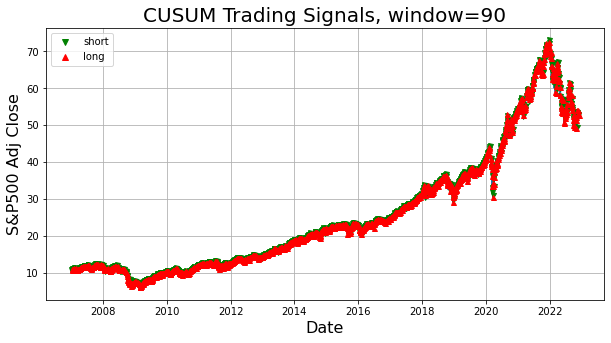

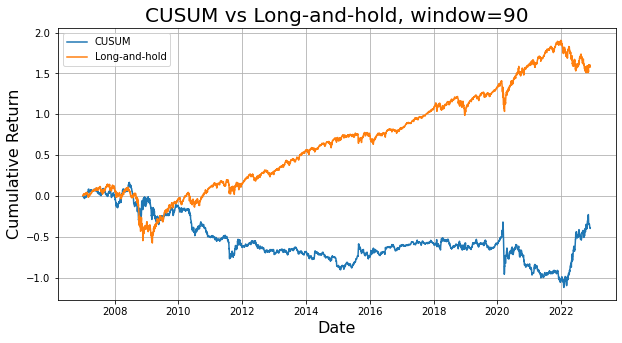

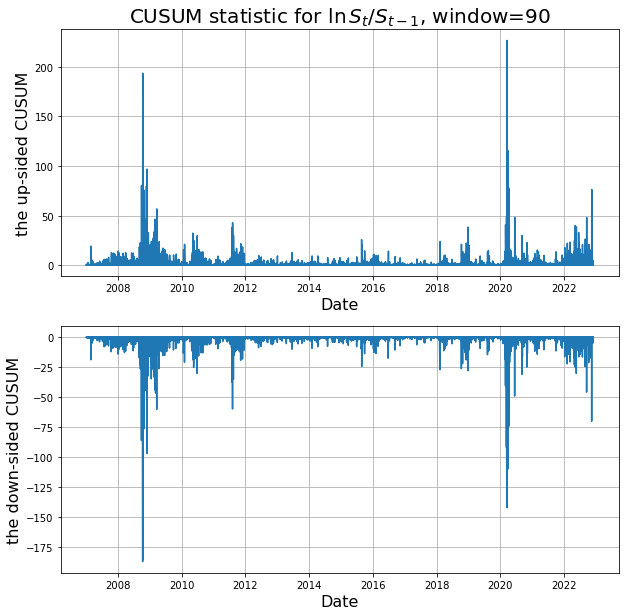

In [301]:
spyg2007a,spyg2007b=cusum_strategy(0,90,'SPYG')

In [302]:
spyg2007=cumretplot(spyg2007a,spyg2007b)
spyg2007.to_csv('spyg2007.csv')

[*********************100%***********************]  1 of 1 completed
2007-01-04 Long Signal: Long at {13.822460174560547}
2007-01-05 Short Signal: Short at {13.724425315856934}
2007-01-08 Long Signal: Long at {13.749344825744629}
2007-01-09 Short Signal: Short at {13.741039276123047}
2007-01-10 Long Signal: Long at {13.741043090820312}
2007-01-11 Short Signal: Short at {13.802518844604492}
2007-01-12 Short Signal: Hold at {13.868978500366211}
2007-01-16 Long Signal: Long at {13.872298240661621}
2007-01-17 Short Signal: Short at {13.867315292358398}
2007-01-18 Short Signal: Hold at {13.859012603759766}
2007-01-19 Long Signal: Long at {13.88061237335205}
2007-01-22 Short Signal: Short at {13.834083557128906}
2007-01-23 Long Signal: Long at {13.88393497467041}
2007-01-24 Short Signal: Short at {13.990270614624023}
2007-01-25 Short Signal: Hold at {13.849040985107422}
2007-01-26 Long Signal: Long at {13.84903621673584}
2007-01-29 Short Signal: Short at {13.830764770507812}
2007-01-30 Short

2007-08-13 Long Signal: Hold at {14.138733863830566}
2007-08-14 Short Signal: Short at {13.921760559082031}
2007-08-15 Short Signal: Hold at {13.65096664428711}
2007-08-16 Long Signal: Long at {13.884756088256836}
2007-08-17 Short Signal: Short at {14.239654541015625}
2007-08-20 Long Signal: Long at {14.269930839538574}
2007-08-21 Short Signal: Short at {14.246383666992188}
2007-08-22 Short Signal: Hold at {14.396078109741211}
2007-08-23 Long Signal: Long at {14.364120483398438}
2007-08-24 Short Signal: Short at {14.5188627243042}
2007-08-27 Short Signal: Hold at {14.37421703338623}
2007-08-28 Short Signal: Hold at {14.027728080749512}
2007-08-29 Long Signal: Long at {14.28338623046875}
2007-08-30 Long Signal: Hold at {14.212739944458008}
2007-08-31 Short Signal: Short at {14.375897407531738}
2007-09-04 Short Signal: Hold at {14.544092178344727}
2007-09-05 Short Signal: Hold at {14.337209701538086}
2007-09-06 Long Signal: Long at {14.394394874572754}
2007-09-07 Short Signal: Short at {

2008-03-26 Short Signal: Short at {12.964035034179688}
2008-03-27 Long Signal: Long at {12.897040367126465}
2008-03-28 Short Signal: Short at {12.761336326599121}
2008-03-31 Long Signal: Long at {12.805998802185059}
2008-04-01 Short Signal: Short at {13.297276496887207}
2008-04-02 Long Signal: Long at {13.295562744140625}
2008-04-04 Short Signal: Short at {13.26464557647705}
2008-04-07 Long Signal: Long at {13.312742233276367}
2008-04-08 Short Signal: Short at {13.266361236572266}
2008-04-09 Short Signal: Hold at {13.11691665649414}
2008-04-10 Long Signal: Long at {13.103172302246094}
2008-04-11 Short Signal: Short at {12.871275901794434}
2008-04-14 Long Signal: Long at {12.78882122039795}
2008-04-15 Long Signal: Hold at {12.842070579528809}
2008-04-16 Short Signal: Short at {13.140962600708008}
2008-04-17 Long Signal: Long at {13.190781593322754}
2008-04-18 Short Signal: Short at {13.386604309082031}
2008-04-21 Long Signal: Long at {13.3007173538208}
2008-04-22 Short Signal: Short at 

2008-11-03 Short Signal: Short at {9.57710075378418}
2008-11-04 Short Signal: Hold at {9.943971633911133}
2008-11-05 Short Signal: Hold at {9.341253280639648}
2008-11-06 Long Signal: Long at {8.87829875946045}
2008-11-07 Long Signal: Hold at {9.07570743560791}
2008-11-10 Long Signal: Hold at {9.023297309875488}
2008-11-11 Short Signal: Short at {8.857329368591309}
2008-11-12 Short Signal: Hold at {8.413594245910645}
2008-11-13 Short Signal: Hold at {8.953414916992188}
2008-11-14 Long Signal: Long at {8.569072723388672}
2008-11-17 Long Signal: Hold at {8.366423606872559}
2008-11-18 Long Signal: Hold at {8.413591384887695}
2008-11-19 Short Signal: Short at {7.957620143890381}
2008-11-20 Short Signal: Hold at {7.351410865783691}
2008-11-21 Long Signal: Long at {7.742737770080566}
2008-11-24 Short Signal: Short at {8.334972381591797}
2008-11-25 Long Signal: Long at {8.481724739074707}
2008-11-26 Short Signal: Short at {8.69835376739502}
2008-11-28 Long Signal: Long at {8.857330322265625}
2

2009-06-19 Long Signal: Long at {8.713772773742676}
2009-06-22 Short Signal: Short at {8.53010082244873}
2009-06-23 Long Signal: Long at {8.50669002532959}
2009-06-24 Long Signal: Hold at {8.522899627685547}
2009-06-25 Short Signal: Short at {8.697566986083984}
2009-06-26 Long Signal: Long at {8.692164421081543}
2009-06-29 Short Signal: Short at {8.784006118774414}
2009-06-30 Long Signal: Long at {8.713775634765625}
2009-07-01 Long Signal: Hold at {8.75699520111084}
2009-07-02 Short Signal: Short at {8.544504165649414}
2009-07-06 Long Signal: Long at {8.549908638000488}
2009-07-07 Short Signal: Short at {8.407649993896484}
2009-07-08 Long Signal: Long at {8.382440567016602}
2009-07-09 Long Signal: Hold at {8.373438835144043}
2009-07-10 Short Signal: Short at {8.332019805908203}
2009-07-13 Short Signal: Hold at {8.560708999633789}
2009-07-14 Long Signal: Long at {8.598525047302246}
2009-07-15 Short Signal: Short at {8.852433204650879}
2009-07-16 Long Signal: Long at {8.937067985534668}


2010-02-01 Short Signal: Hold at {10.371925354003906}
2010-02-02 Short Signal: Hold at {10.504947662353516}
2010-02-03 Long Signal: Long at {10.464859962463379}
2010-02-04 Short Signal: Short at {10.135040283203125}
2010-02-05 Long Signal: Long at {10.093125343322754}
2010-02-08 Long Signal: Hold at {10.084015846252441}
2010-02-09 Short Signal: Short at {10.15872859954834}
2010-02-10 Long Signal: Long at {10.153260231018066}
2010-02-11 Short Signal: Short at {10.220682144165039}
2010-02-12 Short Signal: Hold at {10.171483039855957}
2010-02-16 Short Signal: Hold at {10.391968727111816}
2010-02-17 Long Signal: Long at {10.44116497039795}
2010-02-18 Long Signal: Hold at {10.486721992492676}
2010-02-19 Long Signal: Hold at {10.515876770019531}
2010-02-22 Long Signal: Hold at {10.52499008178711}
2010-02-23 Short Signal: Short at {10.404726028442383}
2010-02-24 Long Signal: Long at {10.488544464111328}
2010-02-25 Long Signal: Hold at {10.432055473327637}
2010-02-26 Long Signal: Hold at {10.4

2010-09-10 Long Signal: Long at {10.789916038513184}
2010-09-13 Short Signal: Short at {10.876585006713867}
2010-09-14 Long Signal: Long at {10.878432273864746}
2010-09-15 Short Signal: Short at {10.907939910888672}
2010-09-16 Short Signal: Hold at {10.88396167755127}
2010-09-17 Long Signal: Long at {10.889720916748047}
2010-09-20 Short Signal: Short at {11.05322551727295}
2010-09-21 Long Signal: Long at {11.014211654663086}
2010-09-22 Short Signal: Short at {10.962182998657227}
2010-09-23 Short Signal: Hold at {10.841414451599121}
2010-09-24 Short Signal: Hold at {11.055082321166992}
2010-09-27 Long Signal: Long at {10.990053176879883}
2010-09-28 Long Signal: Hold at {11.047652244567871}
2010-09-29 Short Signal: Short at {10.999347686767578}
2010-09-30 Long Signal: Long at {10.988199234008789}
2010-10-01 Short Signal: Short at {11.038362503051758}
2010-10-04 Short Signal: Hold at {10.960328102111816}
2010-10-05 Short Signal: Hold at {11.183287620544434}
2010-10-06 Long Signal: Long at

2011-04-25 Short Signal: Short at {12.934447288513184}
2011-04-26 Short Signal: Hold at {13.060332298278809}
2011-04-27 Long Signal: Long at {13.1524019241333}
2011-04-28 Long Signal: Hold at {13.154274940490723}
2011-04-29 Short Signal: Short at {13.212526321411133}
2011-05-02 Long Signal: Long at {13.195613861083984}
2011-05-03 Short Signal: Short at {13.141128540039062}
2011-05-04 Short Signal: Hold at {13.041546821594238}
2011-05-05 Short Signal: Hold at {12.908140182495117}
2011-05-06 Long Signal: Long at {12.973905563354492}
2011-05-09 Long Signal: Hold at {13.019000053405762}
2011-05-10 Short Signal: Short at {13.144879341125488}
2011-05-11 Short Signal: Hold at {12.9513578414917}
2011-05-12 Long Signal: Long at {13.028388023376465}
2011-05-13 Short Signal: Short at {12.898747444152832}
2011-05-16 Long Signal: Long at {12.863046646118164}
2011-05-17 Long Signal: Hold at {12.86116886138916}
2011-05-18 Short Signal: Short at {12.95699405670166}
2011-05-19 Long Signal: Long at {12.

2011-11-30 Short Signal: Short at {11.79672908782959}
2011-12-01 Long Signal: Long at {11.747319221496582}
2011-12-02 Long Signal: Hold at {11.787225723266602}
2011-12-05 Short Signal: Short at {11.952548027038574}
2011-12-06 Long Signal: Long at {11.950645446777344}
2011-12-07 Short Signal: Short at {12.01525592803955}
2011-12-08 Short Signal: Hold at {11.756820678710938}
2011-12-09 Long Signal: Long at {11.906943321228027}
2011-12-12 Short Signal: Short at {11.692211151123047}
2011-12-13 Long Signal: Long at {11.580101013183594}
2011-12-14 Long Signal: Hold at {11.504090309143066}
2011-12-15 Long Signal: Hold at {11.557297706604004}
2011-12-16 Long Signal: Hold at {11.599187850952148}
2011-12-19 Short Signal: Short at {11.40599250793457}
2011-12-20 Short Signal: Hold at {11.786640167236328}
2011-12-21 Long Signal: Long at {11.8019437789917}
2011-12-22 Short Signal: Short at {12.002787590026855}
2011-12-23 Long Signal: Long at {12.079298973083496}
2011-12-27 Long Signal: Hold at {12.1

2012-07-11 Long Signal: Long at {12.797210693359375}
2012-07-12 Short Signal: Short at {12.748885154724121}
2012-07-13 Short Signal: Hold at {12.9653959274292}
2012-07-16 Long Signal: Long at {12.976993560791016}
2012-07-17 Short Signal: Short at {13.062047958374023}
2012-07-18 Long Signal: Long at {13.114240646362305}
2012-07-19 Long Signal: Hold at {13.1007080078125}
2012-07-20 Short Signal: Short at {12.99245834350586}
2012-07-23 Short Signal: Hold at {12.824275016784668}
2012-07-24 Long Signal: Long at {12.683156967163086}
2012-07-25 Long Signal: Hold at {12.768216133117676}
2012-07-26 Short Signal: Short at {13.017582893371582}
2012-07-27 Long Signal: Long at {13.251492500305176}
2012-07-30 Long Signal: Hold at {13.228297233581543}
2012-07-31 Short Signal: Short at {13.191566467285156}
2012-08-01 Long Signal: Long at {13.20123291015625}
2012-08-02 Short Signal: Short at {13.025317192077637}
2012-08-03 Short Signal: Hold at {13.313353538513184}
2012-08-06 Long Signal: Long at {13.3

2013-02-25 Short Signal: Short at {14.960042953491211}
2013-02-26 Long Signal: Long at {15.030655860900879}
2013-02-27 Short Signal: Short at {15.230717658996582}
2013-02-28 Long Signal: Long at {15.19933795928955}
2013-03-01 Long Signal: Hold at {15.246415138244629}
2013-03-04 Long Signal: Hold at {15.289562225341797}
2013-03-05 Short Signal: Short at {15.456290245056152}
2013-03-06 Long Signal: Long at {15.513166427612305}
2013-03-07 Long Signal: Hold at {15.538668632507324}
2013-03-08 Short Signal: Short at {15.605358123779297}
2013-03-11 Long Signal: Long at {15.668126106262207}
2013-03-12 Short Signal: Short at {15.638701438903809}
2013-03-13 Long Signal: Long at {15.68381404876709}
2013-03-14 Short Signal: Short at {15.781888008117676}
2013-03-15 Long Signal: Long at {15.756072998046875}
2013-03-18 Short Signal: Short at {15.626022338867188}
2013-03-19 Long Signal: Long at {15.576761245727539}
2013-03-20 Short Signal: Short at {15.702872276306152}
2013-03-21 Short Signal: Hold at

2013-10-10 Short Signal: Short at {17.09449577331543}
2013-10-11 Long Signal: Long at {17.184171676635742}
2013-10-14 Long Signal: Hold at {17.273849487304688}
2013-10-15 Short Signal: Short at {17.150291442871094}
2013-10-16 Short Signal: Hold at {17.335617065429688}
2013-10-17 Long Signal: Long at {17.495046615600586}
2013-10-18 Long Signal: Hold at {17.562808990478516}
2013-10-21 Long Signal: Hold at {17.564800262451172}
2013-10-22 Short Signal: Short at {17.67441177368164}
2013-10-23 Short Signal: Hold at {17.578750610351562}
2013-10-24 Long Signal: Long at {17.618608474731445}
2013-10-25 Short Signal: Short at {17.69632911682129}
2013-10-28 Long Signal: Long at {17.702306747436523}
2013-10-29 Short Signal: Short at {17.807924270629883}
2013-10-30 Short Signal: Hold at {17.74016761779785}
2013-10-31 Long Signal: Long at {17.6883544921875}
2013-11-01 Long Signal: Hold at {17.722238540649414}
2013-11-04 Short Signal: Short at {17.774051666259766}
2013-11-05 Short Signal: Hold at {17.

2014-05-23 Short Signal: Short at {19.23724937438965}
2014-05-27 Short Signal: Hold at {19.321847915649414}
2014-05-28 Long Signal: Long at {19.325881958007812}
2014-05-29 Short Signal: Short at {19.41653060913086}
2014-05-30 Long Signal: Long at {19.474943161010742}
2014-06-02 Short Signal: Short at {19.444719314575195}
2014-06-03 Long Signal: Long at {19.495084762573242}
2014-06-04 Long Signal: Hold at {19.503141403198242}
2014-06-05 Short Signal: Short at {19.60587501525879}
2014-06-06 Short Signal: Hold at {19.7287540435791}
2014-06-09 Long Signal: Long at {19.7408447265625}
2014-06-10 Short Signal: Short at {19.73882293701172}
2014-06-11 Short Signal: Hold at {19.664295196533203}
2014-06-12 Short Signal: Hold at {19.551488876342773}
2014-06-13 Long Signal: Long at {19.63810157775879}
2014-06-16 Long Signal: Hold at {19.648176193237305}
2014-06-17 Short Signal: Short at {19.71666717529297}
2014-06-18 Short Signal: Hold at {19.879831314086914}
2014-06-19 Long Signal: Long at {19.901

2015-01-07 Long Signal: Hold at {20.376773834228516}
2015-01-08 Short Signal: Short at {20.75385856628418}
2015-01-09 Long Signal: Long at {20.602205276489258}
2015-01-12 Short Signal: Short at {20.382925033569336}
2015-01-13 Long Signal: Long at {20.298898696899414}
2015-01-14 Short Signal: Short at {20.153398513793945}
2015-01-15 Short Signal: Hold at {19.985349655151367}
2015-01-16 Short Signal: Hold at {20.274309158325195}
2015-01-20 Long Signal: Long at {20.2374210357666}
2015-01-21 Short Signal: Short at {20.38702392578125}
2015-01-22 Short Signal: Hold at {20.65753936767578}
2015-01-23 Long Signal: Long at {20.50998306274414}
2015-01-26 Long Signal: Hold at {20.522275924682617}
2015-01-27 Short Signal: Short at {20.35013198852539}
2015-01-28 Short Signal: Hold at {19.99764633178711}
2015-01-29 Long Signal: Long at {20.155441284179688}
2015-01-30 Short Signal: Short at {19.88083267211914}
2015-02-02 Long Signal: Long at {20.194387435913086}
2015-02-03 Short Signal: Short at {20.5

2015-08-20 Short Signal: Hold at {20.196680068969727}
2015-08-21 Short Signal: Hold at {19.583209991455078}
2015-08-24 Short Signal: Hold at {18.814308166503906}
2015-08-25 Long Signal: Long at {18.480636596679688}
2015-08-26 Short Signal: Short at {19.096172332763672}
2015-08-27 Long Signal: Long at {19.55419921875}
2015-08-28 Long Signal: Hold at {19.599794387817383}
2015-08-31 Short Signal: Short at {19.545907974243164}
2015-09-01 Short Signal: Hold at {18.961458206176758}
2015-09-02 Long Signal: Long at {19.25575828552246}
2015-09-03 Long Signal: Hold at {19.301353454589844}
2015-09-04 Short Signal: Short at {19.0775203704834}
2015-09-08 Short Signal: Hold at {19.463008880615234}
2015-09-09 Long Signal: Long at {19.183216094970703}
2015-09-10 Long Signal: Hold at {19.253684997558594}
2015-09-11 Short Signal: Short at {19.330364227294922}
2015-09-14 Short Signal: Hold at {19.24332046508789}
2015-09-15 Short Signal: Hold at {19.510677337646484}
2015-09-16 Long Signal: Long at {19.695

2016-04-01 Long Signal: Hold at {20.627565383911133}
2016-04-04 Short Signal: Short at {20.566251754760742}
2016-04-05 Short Signal: Hold at {20.346403121948242}
2016-04-06 Long Signal: Long at {20.534542083740234}
2016-04-07 Short Signal: Short at {20.293563842773438}
2016-04-08 Long Signal: Long at {20.36543083190918}
2016-04-11 Long Signal: Hold at {20.367551803588867}
2016-04-12 Short Signal: Short at {20.59796142578125}
2016-04-13 Short Signal: Hold at {20.84317970275879}
2016-04-14 Long Signal: Long at {20.877002716064453}
2016-04-15 Short Signal: Short at {20.79244613647461}
2016-04-18 Short Signal: Hold at {20.959444046020508}
2016-04-19 Long Signal: Long at {21.122215270996094}
2016-04-20 Long Signal: Hold at {21.185632705688477}
2016-04-21 Short Signal: Short at {21.039772033691406}
2016-04-22 Long Signal: Long at {21.189861297607422}
2016-04-25 Short Signal: Short at {21.052457809448242}
2016-04-26 Long Signal: Long at {21.206769943237305}
2016-04-27 Long Signal: Hold at {21

2016-11-11 Long Signal: Hold at {22.459365844726562}
2016-11-14 Short Signal: Short at {22.630598068237305}
2016-11-15 Long Signal: Long at {22.76758575439453}
2016-11-16 Short Signal: Short at {22.664846420288086}
2016-11-17 Long Signal: Long at {22.68625259399414}
2016-11-18 Short Signal: Short at {22.677690505981445}
2016-11-21 Short Signal: Hold at {22.863906860351562}
2016-11-22 Long Signal: Long at {22.917415618896484}
2016-11-23 Short Signal: Short at {22.990190505981445}
2016-11-25 Short Signal: Hold at {23.07794952392578}
2016-11-28 Short Signal: Hold at {22.9238338470459}
2016-11-29 Long Signal: Long at {22.953800201416016}
2016-11-30 Short Signal: Short at {23.043699264526367}
2016-12-01 Long Signal: Long at {23.125038146972656}
2016-12-02 Short Signal: Short at {23.092927932739258}
2016-12-05 Short Signal: Hold at {23.212791442871094}
2016-12-07 Short Signal: Hold at {23.649436950683594}
2016-12-08 Long Signal: Long at {23.700803756713867}
2016-12-09 Short Signal: Short at 

2017-07-03 Short Signal: Short at {24.90870475769043}
2017-07-05 Long Signal: Long at {24.906530380249023}
2017-07-06 Short Signal: Short at {24.655986785888672}
2017-07-07 Long Signal: Long at {24.732236862182617}
2017-07-10 Long Signal: Hold at {24.749664306640625}
2017-07-11 Short Signal: Short at {24.701732635498047}
2017-07-12 Short Signal: Hold at {24.82809829711914}
2017-07-13 Long Signal: Long at {24.856416702270508}
2017-07-14 Short Signal: Short at {24.98059844970703}
2017-07-17 Long Signal: Long at {24.9239559173584}
2017-07-18 Short Signal: Short at {24.86077880859375}
2017-07-19 Long Signal: Long at {24.95663833618164}
2017-07-20 Long Signal: Hold at {25.004568099975586}
2017-07-21 Short Signal: Short at {24.930496215820312}
2017-07-24 Long Signal: Long at {24.928316116333008}
2017-07-25 Short Signal: Short at {25.102609634399414}
2017-07-26 Long Signal: Long at {25.03071403503418}
2017-07-27 Long Signal: Hold at {24.991498947143555}
2017-07-28 Long Signal: Hold at {25.056

2018-02-13 Long Signal: Hold at {26.618494033813477}
2018-02-14 Short Signal: Short at {26.929044723510742}
2018-02-15 Long Signal: Long at {27.17748260498047}
2018-02-16 Long Signal: Hold at {27.230716705322266}
2018-02-20 Short Signal: Short at {26.96453285217285}
2018-02-21 Long Signal: Long at {26.79595184326172}
2018-02-22 Long Signal: Hold at {26.76933479309082}
2018-02-23 Short Signal: Short at {27.204105377197266}
2018-02-26 Long Signal: Long at {27.505779266357422}
2018-02-27 Short Signal: Short at {27.141990661621094}
2018-02-28 Short Signal: Hold at {26.769332885742188}
2018-03-01 Long Signal: Long at {26.48540496826172}
2018-03-02 Long Signal: Hold at {26.58300018310547}
2018-03-05 Short Signal: Short at {26.893550872802734}
2018-03-06 Long Signal: Long at {26.94679069519043}
2018-03-07 Short Signal: Short at {26.840316772460938}
2018-03-08 Long Signal: Long at {26.937915802001953}
2018-03-09 Short Signal: Short at {27.381555557250977}
2018-03-12 Long Signal: Long at {27.31

2018-09-26 Short Signal: Short at {28.171634674072266}
2018-09-27 Long Signal: Long at {28.171628952026367}
2018-09-28 Short Signal: Short at {28.144500732421875}
2018-10-01 Short Signal: Hold at {28.253026962280273}
2018-10-02 Long Signal: Long at {28.316335678100586}
2018-10-03 Long Signal: Hold at {28.32537841796875}
2018-10-04 Short Signal: Short at {28.30729103088379}
2018-10-05 Short Signal: Hold at {28.225894927978516}
2018-10-08 Short Signal: Hold at {28.388683319091797}
2018-10-09 Long Signal: Long at {28.298248291015625}
2018-10-10 Short Signal: Short at {27.58378028869629}
2018-10-12 Long Signal: Long at {27.0230655670166}
2018-10-15 Long Signal: Hold at {26.96879768371582}
2018-10-16 Short Signal: Short at {27.375774383544922}
2018-10-17 Long Signal: Long at {27.402902603149414}
2018-10-18 Short Signal: Short at {27.16776466369629}
2018-10-19 Long Signal: Long at {27.212984085083008}
2018-10-22 Short Signal: Short at {26.93262481689453}
2018-10-23 Long Signal: Long at {26.7

2019-05-15 Long Signal: Hold at {27.86380386352539}
2019-05-16 Short Signal: Short at {28.047239303588867}
2019-05-17 Short Signal: Hold at {27.909664154052734}
2019-05-20 Short Signal: Hold at {27.753746032714844}
2019-05-21 Short Signal: Hold at {28.01055335998535}
2019-05-22 Long Signal: Long at {27.845460891723633}
2019-05-23 Short Signal: Short at {27.515277862548828}
2019-05-24 Long Signal: Long at {27.561134338378906}
2019-05-28 Short Signal: Short at {27.212610244750977}
2019-05-29 Long Signal: Long at {27.084203720092773}
2019-05-30 Long Signal: Hold at {27.065858840942383}
2019-05-31 Short Signal: Short at {26.708162307739258}
2019-06-03 Long Signal: Long at {26.882427215576172}
2019-06-04 Short Signal: Short at {27.51527976989746}
2019-06-05 Long Signal: Long at {27.671194076538086}
2019-06-06 Short Signal: Short at {27.854631423950195}
2019-06-07 Long Signal: Long at {28.028898239135742}
2019-06-10 Long Signal: Hold at {28.184816360473633}
2019-06-11 Long Signal: Hold at {2

2019-12-23 Long Signal: Long at {32.60181427001953}
2019-12-24 Short Signal: Short at {32.583126068115234}
2019-12-26 Long Signal: Long at {32.64853286743164}
2019-12-30 Short Signal: Short at {32.51771926879883}
2019-12-31 Long Signal: Long at {32.62050247192383}
2020-01-02 Short Signal: Short at {32.732627868652344}
2020-01-03 Short Signal: Hold at {32.50837326049805}
2020-01-06 Long Signal: Long at {32.55509567260742}
2020-01-07 Short Signal: Short at {32.43360900878906}
2020-01-08 Long Signal: Long at {32.5177116394043}
2020-01-09 Short Signal: Short at {32.657875061035156}
2020-01-10 Short Signal: Hold at {32.545745849609375}
2020-01-13 Long Signal: Long at {32.68590545654297}
2020-01-14 Long Signal: Hold at {32.695255279541016}
2020-01-15 Long Signal: Hold at {32.751319885253906}
2020-01-16 Short Signal: Short at {32.984920501708984}
2020-01-17 Long Signal: Long at {33.04098892211914}
2020-01-21 Short Signal: Short at {32.90082931518555}
2020-01-22 Long Signal: Long at {32.919517

2020-08-06 Long Signal: Long at {29.000244140625}
2020-08-07 Short Signal: Short at {29.313812255859375}
2020-08-10 Long Signal: Long at {29.60837745666504}
2020-08-11 Long Signal: Hold at {29.55136489868164}
2020-08-12 Short Signal: Short at {29.76041030883789}
2020-08-13 Short Signal: Hold at {29.522857666015625}
2020-08-14 Long Signal: Long at {29.598876953125}
2020-08-17 Short Signal: Short at {29.513357162475586}
2020-08-18 Short Signal: Hold at {29.40883445739746}
2020-08-20 Short Signal: Hold at {29.142778396606445}
2020-08-21 Long Signal: Long at {29.12377166748047}
2020-08-24 Short Signal: Short at {29.522859573364258}
2020-08-25 Long Signal: Long at {29.494352340698242}
2020-08-26 Short Signal: Short at {29.4183349609375}
2020-08-27 Short Signal: Hold at {29.636882781982422}
2020-08-28 Long Signal: Long at {29.84592628479004}
2020-08-31 Short Signal: Short at {29.589370727539062}
2020-09-01 Long Signal: Long at {29.589372634887695}
2020-09-02 Short Signal: Short at {30.102483

2021-03-22 Long Signal: Hold at {36.3508186340332}
2021-03-23 Short Signal: Short at {35.88627624511719}
2021-03-24 Long Signal: Long at {35.89594650268555}
2021-03-25 Short Signal: Short at {36.35082244873047}
2021-03-26 Short Signal: Hold at {36.92182540893555}
2021-03-29 Long Signal: Long at {36.85407638549805}
2021-03-30 Long Signal: Hold at {36.86375427246094}
2021-03-31 Short Signal: Short at {36.67987060546875}
2021-04-01 Long Signal: Long at {36.92182540893555}
2021-04-05 Short Signal: Short at {37.270225524902344}
2021-04-06 Long Signal: Long at {37.23152160644531}
2021-04-07 Long Signal: Hold at {37.21216583251953}
2021-04-08 Short Signal: Short at {37.17344665527344}
2021-04-09 Short Signal: Hold at {37.3766975402832}
2021-04-12 Long Signal: Long at {37.42507553100586}
2021-04-13 Short Signal: Short at {37.25088119506836}
2021-04-14 Long Signal: Long at {37.41539764404297}
2021-04-15 Short Signal: Short at {37.60896682739258}
2021-04-16 Short Signal: Hold at {37.812202453613

2021-11-01 Short Signal: Short at {40.093570709228516}
2021-11-02 Long Signal: Long at {40.210853576660156}
2021-11-03 Short Signal: Short at {40.406341552734375}
2021-11-04 Short Signal: Hold at {40.230411529541016}
2021-11-05 Short Signal: Hold at {40.54317855834961}
2021-11-08 Long Signal: Long at {40.60182571411133}
2021-11-09 Short Signal: Short at {40.543182373046875}
2021-11-10 Short Signal: Hold at {40.435665130615234}
2021-11-11 Long Signal: Long at {40.38679122924805}
2021-11-12 Long Signal: Hold at {40.474761962890625}
2021-11-15 Long Signal: Hold at {40.52363204956055}
2021-11-16 Short Signal: Short at {40.464988708496094}
2021-11-17 Short Signal: Hold at {40.27927780151367}
2021-11-18 Long Signal: Long at {40.12289047241211}
2021-11-19 Short Signal: Short at {39.74169921875}
2021-11-22 Long Signal: Long at {39.995826721191406}
2021-11-23 Short Signal: Short at {40.298824310302734}
2021-11-24 Long Signal: Long at {40.30860137939453}
2021-11-26 Short Signal: Short at {39.380

2022-06-15 Long Signal: Hold at {36.63215637207031}
2022-06-16 Short Signal: Short at {35.60471725463867}
2022-06-17 Long Signal: Long at {35.49604415893555}
2022-06-21 Short Signal: Short at {36.30322265625}
2022-06-22 Long Signal: Long at {36.19387435913086}
2022-06-23 Long Signal: Hold at {36.35292434692383}
2022-06-24 Short Signal: Short at {37.346988677978516}
2022-06-27 Long Signal: Long at {37.35693359375}
2022-06-28 Short Signal: Short at {36.92948532104492}
2022-06-29 Long Signal: Long at {36.77043533325195}
2022-06-30 Short Signal: Short at {36.6014404296875}
2022-07-01 Short Signal: Hold at {37.058712005615234}
2022-07-05 Long Signal: Long at {36.72072982788086}
2022-07-06 Long Signal: Hold at {36.73067092895508}
2022-07-07 Short Signal: Short at {37.10841751098633}
2022-07-08 Long Signal: Long at {37.02888870239258}
2022-07-11 Short Signal: Short at {36.81019592285156}
2022-07-12 Long Signal: Long at {36.641204833984375}
2022-07-13 Short Signal: Short at {36.422508239746094

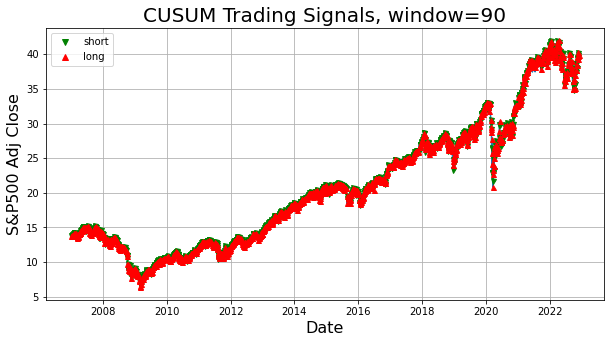

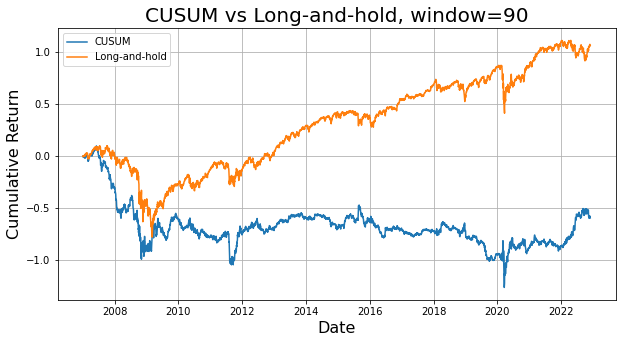

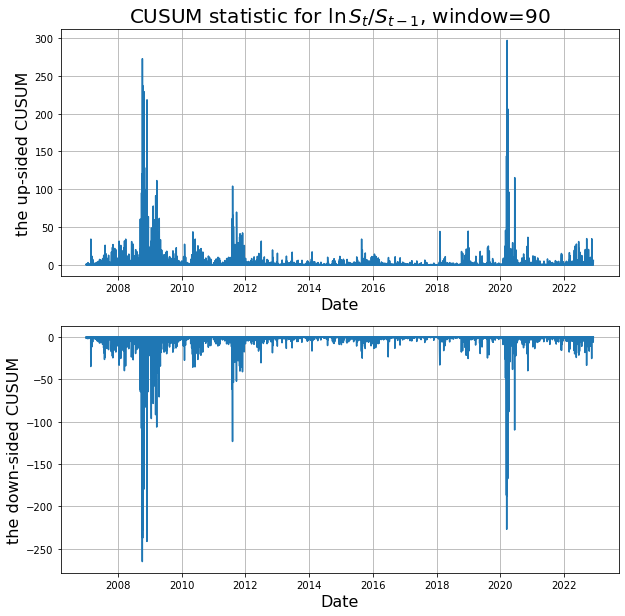

In [303]:
spyv2007a,spyv2007b=cusum_strategy(0,90,'SPYV')

In [304]:
spyv2007=cumretplot(spyv2007a,spyv2007b)
spyv2007.to_csv('spyv2007.csv')

In [297]:
a['return'].cumsum()

0     -0.008369
1     -0.007266
2      0.005018
3     -0.000250
4      0.000399
         ...   
224   -0.276266
225   -0.281222
226   -0.297031
227   -0.245940
228   -0.224606
Name: return, Length: 229, dtype: float64

In [ ]:
def grid_search(a_lst,period,window,ticker):
    grid_res = {}
    for i in range(0,len(a_lst)):
        a1 = a_lst[i]
        for j in range(0,len(a_lst)):
            a2 = a_lst[j]
            start = '1997-11-30'
            end = '2022-11-30'
            data = yf.download(ticker, start, end)
            data['return'] =np.log(data['Adj Close']).diff().to_numpy()
            data.dropna(inplace = True)
            data.reset_index(inplace=True)

            df=data.iloc[-period:,:]

            i = 0
            try_date_list = df['Date'].values
            trade_history = pd.DataFrame(columns=['Date', 'Action', 'Direction', 'mu', 'sigma', 'f', 'Price'])
            W1, W2 = [0], [0]
            cumu_return=0
            W1_list=[]
            W2_list=[]
            return_list=[]
            while i < len(try_date_list):
                the_date = np64_to_datetime(try_date_list[i])
                #print("the date: ",the_date)
                cumu_return, trade_history, W1, W2, W1_t, W2_t = CUSUM_Trading(ticker,cumu_return, the_date, trade_history, window, a1, a2, W1, W2)
                i += 1
                W1_list.append(W1_t)
                W2_list.append(W2_t)
                return_list.append(cumu_return)
            
            trade_history['Date']=pd.to_datetime(trade_history['Date'])
            plot=pd.merge(df,trade_history, how='outer', on='Date').iloc[-period:,]
            
            #print('Cumu Return:', return_list[-1])
            grid_res[a1, a2] = return_list[-1]
            
    pd.DataFrame(np.array([v for v in grid_res.values()]).reshape((len(a_lst),len(a_lst)))).to_csv("res.csv")
    return grid_res


a_lst = [1, 5, 10, 15, 20, 25, 30]
hsi = grid_search(a_lst,60,90,'HSI')

[*********************100%***********************]  1 of 1 completed
2007-01-04 Long Signal: Long at {1418.3399658203125}
2007-01-05 Short Signal: Short at {1409.7099609375}
2007-01-08 Long Signal: Long at {1412.8399658203125}
2007-01-11 Short Signal: Short at {1423.8199462890625}
2007-01-12 Long Signal: Long at {1430.72998046875}
2007-01-16 Long Signal: Hold at {1431.9000244140625}
2007-01-17 Short Signal: Short at {1430.6199951171875}
2007-01-18 Short Signal: Hold at {1426.3699951171875}
2007-01-19 Long Signal: Long at {1430.5}
2007-01-22 Short Signal: Short at {1422.949951171875}
2007-01-23 Long Signal: Long at {1427.989990234375}
2007-01-24 Short Signal: Short at {1440.1300048828125}
2007-01-25 Short Signal: Hold at {1423.9000244140625}
2007-01-26 Long Signal: Long at {1422.1800537109375}
2007-01-30 Short Signal: Short at {1428.8199462890625}
2007-01-31 Short Signal: Hold at {1438.239990234375}
2007-02-01 Long Signal: Long at {1445.93994140625}
2007-02-02 Long Signal: Hold at {1448

2007-09-11 Short Signal: Short at {1471.489990234375}
2007-09-12 Long Signal: Long at {1471.56005859375}
2007-09-13 Short Signal: Short at {1483.949951171875}
2007-09-14 Long Signal: Long at {1484.25}
2007-09-17 Short Signal: Short at {1476.6500244140625}
2007-09-18 Short Signal: Hold at {1519.780029296875}
2007-09-19 Long Signal: Long at {1529.030029296875}
2007-09-20 Short Signal: Short at {1518.75}
2007-09-21 Long Signal: Long at {1525.75}
2007-09-24 Short Signal: Short at {1517.72998046875}
2007-09-25 Long Signal: Long at {1517.2099609375}
2007-09-26 Short Signal: Short at {1525.4200439453125}
2007-09-27 Long Signal: Long at {1531.3800048828125}
2007-09-28 Short Signal: Short at {1526.75}
2007-10-01 Short Signal: Hold at {1547.0400390625}
2007-10-02 Long Signal: Long at {1546.6300048828125}
2007-10-03 Short Signal: Short at {1539.5899658203125}
2007-10-04 Long Signal: Long at {1542.8399658203125}
2007-10-05 Short Signal: Short at {1557.5899658203125}
2007-10-08 Long Signal: Long at

2008-05-02 Long Signal: Long at {1413.9000244140625}
2008-05-05 Short Signal: Short at {1407.489990234375}
2008-05-06 Short Signal: Hold at {1418.260009765625}
2008-05-07 Short Signal: Hold at {1392.5699462890625}
2008-05-08 Long Signal: Long at {1397.6800537109375}
2008-05-09 Short Signal: Short at {1388.280029296875}
2008-05-12 Short Signal: Hold at {1403.5799560546875}
2008-05-13 Long Signal: Long at {1403.0400390625}
2008-05-14 Short Signal: Short at {1408.6600341796875}
2008-05-15 Short Signal: Hold at {1423.5699462890625}
2008-05-16 Long Signal: Long at {1425.3499755859375}
2008-05-20 Short Signal: Short at {1413.4000244140625}
2008-05-21 Short Signal: Hold at {1390.7099609375}
2008-05-22 Long Signal: Long at {1394.3499755859375}
2008-05-23 Short Signal: Short at {1375.9300537109375}
2008-05-27 Long Signal: Long at {1385.3499755859375}
2008-05-28 Long Signal: Hold at {1390.8399658203125}
2008-05-29 Short Signal: Short at {1398.260009765625}
2008-05-30 Long Signal: Long at {1400.3

2008-12-16 Short Signal: Hold at {913.1799926757812}
2008-12-17 Long Signal: Long at {904.4199829101562}
2008-12-18 Short Signal: Short at {885.280029296875}
2008-12-19 Long Signal: Long at {887.8800048828125}
2008-12-22 Short Signal: Short at {871.6300048828125}
2008-12-23 Long Signal: Long at {863.1599731445312}
2008-12-24 Long Signal: Hold at {868.1500244140625}
2008-12-26 Long Signal: Hold at {872.7999877929688}
2008-12-29 Short Signal: Short at {869.4199829101562}
2008-12-30 Short Signal: Hold at {890.6400146484375}
2008-12-31 Long Signal: Long at {903.25}
2009-01-02 Short Signal: Short at {931.7999877929688}
2009-01-05 Long Signal: Long at {927.4500122070312}
2009-01-06 Short Signal: Short at {934.7000122070312}
2009-01-07 Short Signal: Hold at {906.6500244140625}
2009-01-08 Long Signal: Long at {909.72998046875}
2009-01-09 Short Signal: Short at {890.3499755859375}
2009-01-12 Short Signal: Hold at {870.260009765625}
2009-01-13 Long Signal: Long at {871.7899780273438}
2009-01-14 

2009-08-10 Long Signal: Long at {1007.0999755859375}
2009-08-11 Short Signal: Short at {994.3499755859375}
2009-08-12 Long Signal: Long at {1005.8099975585938}
2009-08-13 Long Signal: Hold at {1012.72998046875}
2009-08-14 Short Signal: Short at {1004.0900268554688}
2009-08-17 Short Signal: Hold at {979.72998046875}
2009-08-18 Long Signal: Long at {989.6699829101562}
2009-08-19 Long Signal: Hold at {996.4600219726562}
2009-08-20 Short Signal: Short at {1007.3699951171875}
2009-08-21 Short Signal: Hold at {1026.1300048828125}
2009-08-24 Long Signal: Long at {1025.5699462890625}
2009-08-28 Short Signal: Short at {1028.9300537109375}
2009-08-31 Short Signal: Hold at {1020.6199951171875}
2009-09-01 Short Signal: Hold at {998.0399780273438}
2009-09-02 Long Signal: Long at {994.75}
2009-09-03 Short Signal: Short at {1003.239990234375}
2009-09-04 Short Signal: Hold at {1016.4000244140625}
2009-09-08 Long Signal: Long at {1025.3900146484375}
2009-09-09 Long Signal: Hold at {1033.3699951171875}


2010-04-07 Short Signal: Short at {1182.449951171875}
2010-04-08 Long Signal: Long at {1186.43994140625}
2010-04-09 Short Signal: Short at {1194.3699951171875}
2010-04-12 Long Signal: Long at {1196.47998046875}
2010-04-14 Short Signal: Short at {1210.6500244140625}
2010-04-15 Long Signal: Long at {1211.6700439453125}
2010-04-16 Short Signal: Short at {1192.1300048828125}
2010-04-19 Long Signal: Long at {1197.52001953125}
2010-04-20 Short Signal: Short at {1207.1700439453125}
2010-04-21 Long Signal: Long at {1205.93994140625}
2010-04-23 Short Signal: Short at {1217.280029296875}
2010-04-26 Long Signal: Long at {1212.050048828125}
2010-04-27 Short Signal: Short at {1183.7099609375}
2010-04-28 Long Signal: Long at {1191.3599853515625}
2010-04-29 Short Signal: Short at {1206.780029296875}
2010-04-30 Short Signal: Hold at {1186.68994140625}
2010-05-03 Long Signal: Long at {1202.260009765625}
2010-05-04 Short Signal: Short at {1173.5999755859375}
2010-05-05 Long Signal: Long at {1165.8699951

2010-12-10 Short Signal: Hold at {1240.4000244140625}
2010-12-13 Long Signal: Long at {1240.4599609375}
2010-12-15 Short Signal: Short at {1235.22998046875}
2010-12-16 Long Signal: Long at {1242.8699951171875}
2010-12-17 Long Signal: Hold at {1243.9100341796875}
2010-12-20 Short Signal: Short at {1247.0799560546875}
2010-12-21 Short Signal: Hold at {1254.5999755859375}
2010-12-22 Long Signal: Long at {1258.8399658203125}
2010-12-27 Long Signal: Hold at {1257.5400390625}
2010-12-30 Short Signal: Short at {1257.8800048828125}
2010-12-31 Long Signal: Long at {1257.6400146484375}
2011-01-03 Short Signal: Short at {1271.8699951171875}
2011-01-04 Long Signal: Long at {1270.199951171875}
2011-01-05 Short Signal: Short at {1276.56005859375}
2011-01-06 Long Signal: Long at {1273.8499755859375}
2011-01-10 Long Signal: Hold at {1269.75}
2011-01-12 Short Signal: Short at {1285.9599609375}
2011-01-13 Long Signal: Long at {1283.760009765625}
2011-01-14 Short Signal: Short at {1293.239990234375}
2011

2011-08-15 Short Signal: Short at {1204.489990234375}
2011-08-16 Long Signal: Long at {1192.760009765625}
2011-08-17 Long Signal: Hold at {1193.8900146484375}
2011-08-18 Short Signal: Short at {1140.6500244140625}
2011-08-19 Long Signal: Long at {1123.530029296875}
2011-08-22 Long Signal: Hold at {1123.8199462890625}
2011-08-23 Short Signal: Short at {1162.3499755859375}
2011-08-24 Long Signal: Long at {1177.5999755859375}
2011-08-25 Short Signal: Short at {1159.27001953125}
2011-08-26 Long Signal: Long at {1176.800048828125}
2011-08-29 Short Signal: Short at {1210.0799560546875}
2011-08-30 Long Signal: Long at {1212.9200439453125}
2011-08-31 Short Signal: Short at {1218.8900146484375}
2011-09-01 Short Signal: Hold at {1204.4200439453125}
2011-09-02 Short Signal: Hold at {1173.969970703125}
2011-09-06 Long Signal: Long at {1165.239990234375}
2011-09-07 Short Signal: Short at {1198.6199951171875}
2011-09-08 Long Signal: Long at {1185.9000244140625}
2011-09-09 Short Signal: Short at {115

2012-04-12 Short Signal: Short at {1387.5699462890625}
2012-04-13 Short Signal: Hold at {1370.260009765625}
2012-04-16 Long Signal: Long at {1369.5699462890625}
2012-04-17 Short Signal: Short at {1390.780029296875}
2012-04-18 Long Signal: Long at {1385.1400146484375}
2012-04-19 Short Signal: Short at {1376.9200439453125}
2012-04-20 Long Signal: Long at {1378.530029296875}
2012-04-23 Short Signal: Short at {1366.93994140625}
2012-04-24 Long Signal: Long at {1371.969970703125}
2012-04-25 Short Signal: Short at {1390.68994140625}
2012-04-26 Long Signal: Long at {1399.97998046875}
2012-04-27 Long Signal: Hold at {1403.3599853515625}
2012-04-30 Short Signal: Short at {1397.9100341796875}
2012-05-02 Long Signal: Long at {1402.31005859375}
2012-05-03 Short Signal: Short at {1391.5699462890625}
2012-05-04 Short Signal: Hold at {1369.0999755859375}
2012-05-07 Long Signal: Long at {1369.5799560546875}
2012-05-08 Short Signal: Short at {1363.719970703125}
2012-05-09 Short Signal: Hold at {1354.57

2012-12-19 Long Signal: Hold at {1435.81005859375}
2012-12-20 Long Signal: Hold at {1443.68994140625}
2012-12-21 Short Signal: Short at {1430.1500244140625}
2012-12-24 Long Signal: Long at {1426.6600341796875}
2012-12-26 Short Signal: Short at {1419.8299560546875}
2012-12-27 Long Signal: Long at {1418.0999755859375}
2012-12-28 Short Signal: Short at {1402.4300537109375}
2012-12-31 Short Signal: Hold at {1426.18994140625}
2013-01-02 Short Signal: Hold at {1462.4200439453125}
2013-01-03 Long Signal: Long at {1459.3699951171875}
2013-01-04 Short Signal: Short at {1466.469970703125}
2013-01-07 Short Signal: Hold at {1461.8900146484375}
2013-01-09 Long Signal: Long at {1461.02001953125}
2013-01-10 Short Signal: Short at {1472.1199951171875}
2013-01-11 Long Signal: Long at {1472.050048828125}
2013-01-14 Short Signal: Short at {1470.6800537109375}
2013-01-17 Short Signal: Hold at {1480.93994140625}
2013-01-18 Long Signal: Long at {1485.97998046875}
2013-01-22 Short Signal: Short at {1492.5600

2013-09-05 Long Signal: Long at {1655.0799560546875}
2013-09-09 Short Signal: Short at {1671.7099609375}
2013-09-10 Long Signal: Long at {1683.989990234375}
2013-09-11 Long Signal: Hold at {1689.1300048828125}
2013-09-12 Short Signal: Short at {1683.4200439453125}
2013-09-13 Long Signal: Long at {1687.989990234375}
2013-09-16 Short Signal: Short at {1697.5999755859375}
2013-09-17 Long Signal: Long at {1704.760009765625}
2013-09-18 Short Signal: Short at {1725.52001953125}
2013-09-19 Long Signal: Long at {1722.3399658203125}
2013-09-20 Short Signal: Short at {1709.9100341796875}
2013-09-23 Long Signal: Long at {1701.8399658203125}
2013-09-24 Long Signal: Hold at {1697.4200439453125}
2013-09-26 Long Signal: Hold at {1698.6700439453125}
2013-09-27 Short Signal: Short at {1691.75}
2013-09-30 Short Signal: Hold at {1681.550048828125}
2013-10-02 Long Signal: Long at {1693.8699951171875}
2013-10-03 Short Signal: Short at {1678.6600341796875}
2013-10-04 Long Signal: Long at {1690.5}
2013-10-07

2014-05-15 Short Signal: Hold at {1870.8499755859375}
2014-05-16 Long Signal: Long at {1877.8599853515625}
2014-05-20 Short Signal: Short at {1872.8299560546875}
2014-05-21 Long Signal: Long at {1888.030029296875}
2014-05-22 Long Signal: Hold at {1892.489990234375}
2014-05-23 Short Signal: Short at {1900.530029296875}
2014-05-27 Short Signal: Hold at {1911.9100341796875}
2014-05-28 Long Signal: Long at {1909.780029296875}
2014-05-29 Short Signal: Short at {1920.030029296875}
2014-05-30 Long Signal: Long at {1923.5699462890625}
2014-06-05 Short Signal: Short at {1940.4599609375}
2014-06-06 Long Signal: Long at {1949.43994140625}
2014-06-09 Long Signal: Hold at {1951.27001953125}
2014-06-11 Short Signal: Short at {1943.8900146484375}
2014-06-12 Short Signal: Hold at {1930.1099853515625}
2014-06-13 Long Signal: Long at {1936.1600341796875}
2014-06-16 Long Signal: Hold at {1937.780029296875}
2014-06-18 Short Signal: Short at {1956.97998046875}
2014-06-19 Long Signal: Long at {1959.47998046

2015-02-04 Long Signal: Long at {2041.510009765625}
2015-02-05 Short Signal: Short at {2062.52001953125}
2015-02-06 Long Signal: Long at {2055.469970703125}
2015-02-09 Short Signal: Short at {2046.739990234375}
2015-02-10 Short Signal: Hold at {2068.590087890625}
2015-02-11 Long Signal: Long at {2068.530029296875}
2015-02-12 Short Signal: Short at {2088.47998046875}
2015-02-13 Long Signal: Long at {2096.989990234375}
2015-02-17 Long Signal: Hold at {2100.340087890625}
2015-02-19 Short Signal: Short at {2097.449951171875}
2015-02-20 Short Signal: Hold at {2110.300048828125}
2015-02-23 Long Signal: Long at {2109.659912109375}
2015-02-26 Short Signal: Short at {2110.739990234375}
2015-02-27 Short Signal: Hold at {2104.5}
2015-03-02 Short Signal: Hold at {2117.389892578125}
2015-03-03 Short Signal: Hold at {2107.780029296875}
2015-03-05 Long Signal: Long at {2101.0400390625}
2015-03-06 Short Signal: Short at {2071.260009765625}
2015-03-09 Long Signal: Long at {2079.429931640625}
2015-03-10

2015-10-07 Short Signal: Short at {1995.8299560546875}
2015-10-08 Short Signal: Hold at {2013.4300537109375}
2015-10-09 Long Signal: Long at {2014.8900146484375}
2015-10-13 Short Signal: Short at {2003.68994140625}
2015-10-14 Long Signal: Long at {1994.239990234375}
2015-10-15 Short Signal: Short at {2023.8599853515625}
2015-10-16 Long Signal: Long at {2033.1099853515625}
2015-10-19 Long Signal: Hold at {2033.6600341796875}
2015-10-20 Short Signal: Short at {2030.77001953125}
2015-10-21 Short Signal: Hold at {2018.93994140625}
2015-10-22 Short Signal: Hold at {2052.510009765625}
2015-10-23 Long Signal: Long at {2075.14990234375}
2015-10-26 Long Signal: Hold at {2071.179931640625}
2015-10-27 Short Signal: Short at {2065.889892578125}
2015-10-28 Short Signal: Hold at {2090.35009765625}
2015-10-29 Long Signal: Long at {2089.409912109375}
2015-10-30 Short Signal: Short at {2079.360107421875}
2015-11-02 Short Signal: Hold at {2104.050048828125}
2015-11-03 Long Signal: Long at {2109.79003906

2016-06-09 Short Signal: Hold at {2115.47998046875}
2016-06-10 Short Signal: Hold at {2096.070068359375}
2016-06-13 Long Signal: Long at {2079.06005859375}
2016-06-14 Long Signal: Hold at {2075.320068359375}
2016-06-17 Short Signal: Short at {2071.219970703125}
2016-06-20 Short Signal: Hold at {2083.25}
2016-06-21 Long Signal: Long at {2088.89990234375}
2016-06-22 Short Signal: Short at {2085.449951171875}
2016-06-23 Short Signal: Hold at {2113.320068359375}
2016-06-24 Short Signal: Hold at {2037.4100341796875}
2016-06-27 Long Signal: Long at {2000.5400390625}
2016-06-28 Long Signal: Hold at {2036.0899658203125}
2016-06-29 Long Signal: Hold at {2070.77001953125}
2016-06-30 Long Signal: Hold at {2098.860107421875}
2016-07-01 Long Signal: Hold at {2102.949951171875}
2016-07-05 Short Signal: Short at {2088.550048828125}
2016-07-06 Long Signal: Long at {2099.72998046875}
2016-07-07 Long Signal: Hold at {2097.89990234375}
2016-07-08 Short Signal: Short at {2129.89990234375}
2016-07-11 Long 

2017-03-03 Long Signal: Hold at {2383.1201171875}
2017-03-06 Short Signal: Short at {2375.31005859375}
2017-03-08 Long Signal: Long at {2362.97998046875}
2017-03-09 Long Signal: Hold at {2364.8701171875}
2017-03-10 Short Signal: Short at {2372.60009765625}
2017-03-13 Long Signal: Long at {2373.469970703125}
2017-03-14 Short Signal: Short at {2365.449951171875}
2017-03-15 Short Signal: Hold at {2385.260009765625}
2017-03-16 Long Signal: Long at {2381.3798828125}
2017-03-20 Short Signal: Short at {2373.469970703125}
2017-03-21 Short Signal: Hold at {2344.02001953125}
2017-03-22 Long Signal: Long at {2348.449951171875}
2017-03-23 Short Signal: Short at {2345.9599609375}
2017-03-28 Short Signal: Hold at {2358.570068359375}
2017-03-29 Long Signal: Long at {2361.1298828125}
2017-03-30 Short Signal: Short at {2368.06005859375}
2017-03-31 Short Signal: Hold at {2362.719970703125}
2017-04-04 Long Signal: Long at {2360.159912109375}
2017-04-05 Short Signal: Short at {2352.949951171875}
2017-04-0

2018-01-05 Short Signal: Short at {2743.14990234375}
2018-01-08 Long Signal: Long at {2747.7099609375}
2018-01-10 Short Signal: Short at {2748.22998046875}
2018-01-11 Short Signal: Hold at {2767.56005859375}
2018-01-16 Long Signal: Long at {2776.419921875}
2018-01-17 Short Signal: Short at {2802.56005859375}
2018-01-18 Long Signal: Long at {2798.030029296875}
2018-01-19 Short Signal: Short at {2810.300048828125}
2018-01-22 Short Signal: Hold at {2832.969970703125}
2018-01-23 Long Signal: Long at {2839.1298828125}
2018-01-26 Short Signal: Short at {2872.8701171875}
2018-01-29 Long Signal: Long at {2853.530029296875}
2018-01-30 Short Signal: Short at {2822.429931640625}
2018-01-31 Long Signal: Long at {2823.81005859375}
2018-02-01 Short Signal: Short at {2821.97998046875}
2018-02-02 Short Signal: Hold at {2762.1298828125}
2018-02-05 Short Signal: Hold at {2648.93994140625}
2018-02-06 Long Signal: Long at {2695.139892578125}
2018-02-07 Long Signal: Hold at {2681.659912109375}
2018-02-08 S

2018-09-17 Short Signal: Short at {2888.800048828125}
2018-09-18 Long Signal: Long at {2904.31005859375}
2018-09-19 Long Signal: Hold at {2907.949951171875}
2018-09-20 Short Signal: Short at {2930.75}
2018-09-21 Long Signal: Long at {2929.669921875}
2018-09-24 Short Signal: Short at {2919.3701171875}
2018-09-25 Long Signal: Long at {2915.56005859375}
2018-09-26 Short Signal: Short at {2905.969970703125}
2018-09-27 Long Signal: Long at {2914.0}
2018-10-01 Short Signal: Short at {2924.590087890625}
2018-10-02 Long Signal: Long at {2923.429931640625}
2018-10-04 Short Signal: Short at {2901.610107421875}
2018-10-05 Long Signal: Long at {2885.570068359375}
2018-10-08 Long Signal: Hold at {2884.429931640625}
2018-10-09 Short Signal: Short at {2880.340087890625}
2018-10-10 Short Signal: Hold at {2785.679931640625}
2018-10-11 Long Signal: Long at {2728.3701171875}
2018-10-12 Long Signal: Hold at {2767.1298828125}
2018-10-15 Long Signal: Hold at {2750.7900390625}
2018-10-16 Short Signal: Short 

2019-05-24 Long Signal: Long at {2826.06005859375}
2019-05-28 Short Signal: Short at {2802.389892578125}
2019-05-29 Long Signal: Long at {2783.02001953125}
2019-05-30 Long Signal: Hold at {2788.860107421875}
2019-05-31 Short Signal: Short at {2752.06005859375}
2019-06-03 Long Signal: Long at {2744.449951171875}
2019-06-04 Short Signal: Short at {2803.27001953125}
2019-06-05 Long Signal: Long at {2826.14990234375}
2019-06-06 Long Signal: Hold at {2843.489990234375}
2019-06-07 Short Signal: Short at {2873.340087890625}
2019-06-10 Long Signal: Long at {2886.72998046875}
2019-06-11 Long Signal: Hold at {2885.719970703125}
2019-06-12 Short Signal: Short at {2879.840087890625}
2019-06-17 Long Signal: Long at {2889.669921875}
2019-06-18 Short Signal: Short at {2917.75}
2019-06-19 Long Signal: Long at {2926.4599609375}
2019-06-20 Short Signal: Short at {2954.179931640625}
2019-06-21 Long Signal: Long at {2950.4599609375}
2019-06-24 Short Signal: Short at {2945.35009765625}
2019-06-25 Short Sig

2020-02-11 Long Signal: Long at {3357.75}
2020-02-12 Short Signal: Short at {3379.449951171875}
2020-02-13 Long Signal: Long at {3373.93994140625}
2020-02-14 Long Signal: Hold at {3380.159912109375}
2020-02-18 Short Signal: Short at {3370.2900390625}
2020-02-20 Short Signal: Hold at {3373.22998046875}
2020-02-21 Short Signal: Hold at {3337.75}
2020-02-24 Short Signal: Hold at {3225.889892578125}
2020-02-25 Long Signal: Long at {3128.2099609375}
2020-02-26 Long Signal: Hold at {3116.389892578125}
2020-02-27 Short Signal: Short at {2978.760009765625}
2020-02-28 Long Signal: Long at {2954.219970703125}
2020-03-02 Short Signal: Short at {3090.22998046875}
2020-03-03 Long Signal: Long at {3003.3701171875}
2020-03-04 Short Signal: Short at {3130.1201171875}
2020-03-05 Long Signal: Long at {3023.93994140625}
2020-03-06 Long Signal: Hold at {2972.3701171875}
2020-03-09 Short Signal: Short at {2746.56005859375}
2020-03-10 Long Signal: Long at {2882.22998046875}
2020-03-11 Short Signal: Short at

2020-10-08 Long Signal: Long at {3446.830078125}
2020-10-09 Short Signal: Short at {3477.139892578125}
2020-10-12 Short Signal: Hold at {3534.219970703125}
2020-10-13 Long Signal: Long at {3511.929931640625}
2020-10-14 Short Signal: Short at {3488.669921875}
2020-10-15 Long Signal: Long at {3483.340087890625}
2020-10-16 Long Signal: Hold at {3483.81005859375}
2020-10-19 Short Signal: Short at {3426.919921875}
2020-10-20 Long Signal: Long at {3443.1201171875}
2020-10-22 Short Signal: Short at {3453.489990234375}
2020-10-23 Long Signal: Long at {3465.389892578125}
2020-10-26 Short Signal: Short at {3400.969970703125}
2020-10-27 Long Signal: Long at {3390.679931640625}
2020-10-28 Short Signal: Short at {3271.030029296875}
2020-10-29 Long Signal: Long at {3310.110107421875}
2020-10-30 Short Signal: Short at {3269.9599609375}
2020-11-02 Long Signal: Long at {3310.239990234375}
2020-11-03 Short Signal: Short at {3369.159912109375}
2020-11-04 Short Signal: Hold at {3443.43994140625}
2020-11-0

2021-06-22 Long Signal: Hold at {4246.43994140625}
2021-06-23 Long Signal: Hold at {4241.83984375}
2021-06-24 Short Signal: Short at {4266.490234375}
2021-06-25 Long Signal: Long at {4280.7001953125}
2021-06-29 Long Signal: Hold at {4291.7998046875}
2021-07-01 Short Signal: Short at {4319.93994140625}
2021-07-02 Short Signal: Hold at {4352.33984375}
2021-07-06 Long Signal: Long at {4343.5400390625}
2021-07-07 Long Signal: Hold at {4358.1298828125}
2021-07-08 Short Signal: Short at {4320.81982421875}
2021-07-09 Short Signal: Hold at {4369.5498046875}
2021-07-12 Long Signal: Long at {4384.6298828125}
2021-07-13 Short Signal: Short at {4369.2099609375}
2021-07-14 Long Signal: Long at {4374.2998046875}
2021-07-15 Short Signal: Short at {4360.02978515625}
2021-07-16 Short Signal: Hold at {4327.16015625}
2021-07-19 Short Signal: Hold at {4258.490234375}
2021-07-20 Long Signal: Long at {4323.06005859375}
2021-07-21 Long Signal: Hold at {4358.68994140625}
2021-07-22 Long Signal: Hold at {4367.

2022-03-01 Short Signal: Short at {4306.259765625}
2022-03-02 Short Signal: Hold at {4386.5400390625}
2022-03-03 Long Signal: Long at {4363.490234375}
2022-03-04 Short Signal: Short at {4328.8701171875}
2022-03-07 Short Signal: Hold at {4201.08984375}
2022-03-08 Long Signal: Long at {4170.7001953125}
2022-03-09 Short Signal: Short at {4277.8798828125}
2022-03-10 Long Signal: Long at {4259.52001953125}
2022-03-11 Short Signal: Short at {4204.31005859375}
2022-03-14 Long Signal: Long at {4173.10986328125}
2022-03-15 Short Signal: Short at {4262.4501953125}
2022-03-16 Short Signal: Hold at {4357.85986328125}
2022-03-17 Long Signal: Long at {4411.669921875}
2022-03-18 Long Signal: Hold at {4463.1201171875}
2022-03-21 Long Signal: Hold at {4461.18017578125}
2022-03-22 Short Signal: Short at {4511.60986328125}
2022-03-23 Short Signal: Hold at {4456.240234375}
2022-03-24 Long Signal: Long at {4520.16015625}
2022-03-25 Long Signal: Hold at {4543.06005859375}
2022-03-28 Short Signal: Short at {

2022-10-19 Long Signal: Hold at {3695.159912109375}
2022-10-20 Short Signal: Short at {3665.780029296875}
2022-10-21 Short Signal: Hold at {3752.75}
2022-10-24 Long Signal: Long at {3797.340087890625}
2022-10-25 Short Signal: Short at {3859.110107421875}
2022-10-26 Long Signal: Long at {3830.60009765625}
2022-10-27 Long Signal: Hold at {3807.300048828125}
2022-10-28 Short Signal: Short at {3901.06005859375}
2022-10-31 Long Signal: Long at {3871.97998046875}
2022-11-01 Long Signal: Hold at {3856.10009765625}
2022-11-02 Short Signal: Short at {3759.68994140625}
2022-11-03 Long Signal: Long at {3719.889892578125}
2022-11-04 Short Signal: Short at {3770.550048828125}
2022-11-07 Long Signal: Long at {3806.800048828125}
2022-11-08 Long Signal: Hold at {3828.110107421875}
2022-11-09 Short Signal: Short at {3748.570068359375}
2022-11-10 Short Signal: Hold at {3956.3701171875}
2022-11-11 Long Signal: Long at {3992.929931640625}
2022-11-14 Short Signal: Short at {3957.25}
2022-11-15 Long Signal:

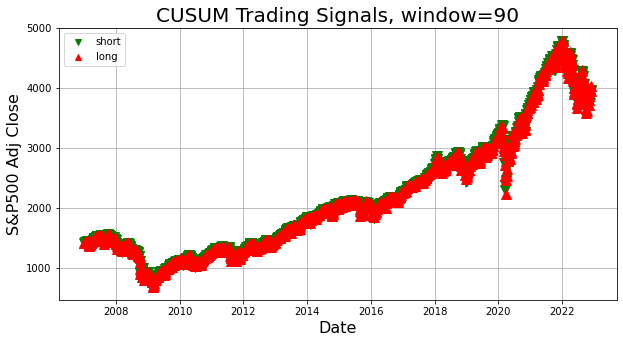

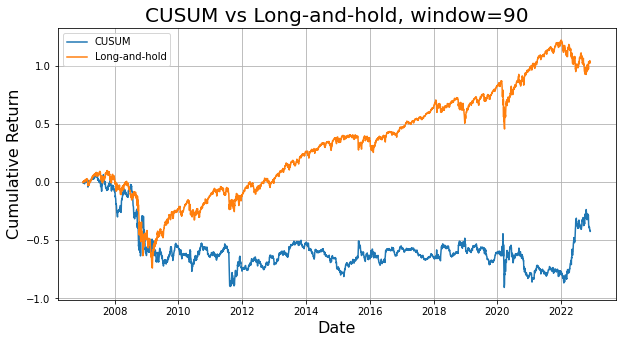

In [268]:
e,f=cusum_strategy(0,90,'^GSPC')

In [276]:
def cumret(a,b):
    a.loc[:,"active"]=b
    df2 = a.copy()
    df2['year']=df2['Date'].dt.year
    df2['passive']=df2['return'].cumsum()
    g = df2.groupby('year')
    df=g['passive'].tail(1).to_frame('passive').reset_index(drop=True)
    df.loc[:,'active']=g['active'].tail(1).reset_index(drop=True)
    return df

In [279]:
spy_tune=cumretplot(e,f)
spy_tune.to_csv('sp500tune.csv')

[*********************100%***********************]  1 of 1 completed
2007-01-04 Long Signal: Long at {1418.3399658203125}
2007-01-05 Short Signal: Short at {1409.7099609375}
2007-01-08 Long Signal: Long at {1412.8399658203125}
2007-01-09 Short Signal: Short at {1412.1099853515625}
2007-01-10 Long Signal: Long at {1414.8499755859375}
2007-01-11 Short Signal: Short at {1423.8199462890625}
2007-01-12 Long Signal: Long at {1430.72998046875}
2007-01-16 Long Signal: Hold at {1431.9000244140625}
2007-01-17 Short Signal: Short at {1430.6199951171875}
2007-01-18 Short Signal: Hold at {1426.3699951171875}
2007-01-19 Long Signal: Long at {1430.5}
2007-01-22 Short Signal: Short at {1422.949951171875}
2007-01-23 Long Signal: Long at {1427.989990234375}
2007-01-24 Short Signal: Short at {1440.1300048828125}
2007-01-25 Short Signal: Hold at {1423.9000244140625}
2007-01-26 Long Signal: Long at {1422.1800537109375}
2007-01-29 Long Signal: Hold at {1420.6199951171875}
2007-01-30 Short Signal: Short at {

2007-08-21 Long Signal: Hold at {1447.1199951171875}
2007-08-22 Short Signal: Short at {1464.0699462890625}
2007-08-23 Long Signal: Long at {1462.5}
2007-08-24 Short Signal: Short at {1479.3699951171875}
2007-08-27 Long Signal: Long at {1466.7900390625}
2007-08-28 Short Signal: Short at {1432.3599853515625}
2007-08-29 Long Signal: Long at {1463.760009765625}
2007-08-30 Long Signal: Hold at {1457.6400146484375}
2007-08-31 Short Signal: Short at {1473.989990234375}
2007-09-04 Long Signal: Long at {1489.4200439453125}
2007-09-05 Short Signal: Short at {1472.2900390625}
2007-09-06 Long Signal: Long at {1478.550048828125}
2007-09-07 Short Signal: Short at {1453.550048828125}
2007-09-10 Long Signal: Long at {1451.699951171875}
2007-09-11 Short Signal: Short at {1471.489990234375}
2007-09-12 Long Signal: Long at {1471.56005859375}
2007-09-13 Short Signal: Short at {1483.949951171875}
2007-09-14 Long Signal: Long at {1484.25}
2007-09-17 Short Signal: Short at {1476.6500244140625}
2007-09-18 Sh

2008-04-08 Short Signal: Hold at {1365.5400390625}
2008-04-09 Short Signal: Hold at {1354.489990234375}
2008-04-10 Long Signal: Long at {1360.550048828125}
2008-04-11 Short Signal: Short at {1332.8299560546875}
2008-04-14 Long Signal: Long at {1328.3199462890625}
2008-04-15 Long Signal: Hold at {1334.4300537109375}
2008-04-16 Short Signal: Short at {1364.7099609375}
2008-04-17 Long Signal: Long at {1365.56005859375}
2008-04-18 Short Signal: Short at {1390.3299560546875}
2008-04-21 Long Signal: Long at {1388.1700439453125}
2008-04-22 Short Signal: Short at {1375.93994140625}
2008-04-23 Long Signal: Long at {1379.9300537109375}
2008-04-24 Short Signal: Short at {1388.8199462890625}
2008-04-25 Short Signal: Hold at {1397.8399658203125}
2008-04-28 Long Signal: Long at {1396.3699951171875}
2008-04-29 Short Signal: Short at {1390.93994140625}
2008-04-30 Long Signal: Long at {1385.5899658203125}
2008-05-01 Short Signal: Short at {1409.3399658203125}
2008-05-02 Long Signal: Long at {1413.90002

2008-11-18 Long Signal: Hold at {859.1199951171875}
2008-11-19 Short Signal: Short at {806.5800170898438}
2008-11-20 Short Signal: Hold at {752.4400024414062}
2008-11-21 Long Signal: Long at {800.030029296875}
2008-11-24 Short Signal: Short at {851.8099975585938}
2008-11-25 Long Signal: Long at {857.3900146484375}
2008-11-26 Short Signal: Short at {887.6799926757812}
2008-11-28 Long Signal: Long at {896.239990234375}
2008-12-01 Short Signal: Short at {816.2100219726562}
2008-12-02 Long Signal: Long at {848.8099975585938}
2008-12-03 Long Signal: Hold at {870.739990234375}
2008-12-04 Short Signal: Short at {845.219970703125}
2008-12-05 Short Signal: Hold at {876.0700073242188}
2008-12-08 Short Signal: Hold at {909.7000122070312}
2008-12-09 Long Signal: Long at {888.6699829101562}
2008-12-10 Long Signal: Hold at {899.239990234375}
2008-12-11 Short Signal: Short at {873.5900268554688}
2008-12-12 Long Signal: Long at {879.72998046875}
2008-12-15 Short Signal: Short at {868.5700073242188}
20

2009-07-08 Long Signal: Long at {879.5599975585938}
2009-07-09 Long Signal: Hold at {882.6799926757812}
2009-07-10 Short Signal: Short at {879.1300048828125}
2009-07-13 Short Signal: Hold at {901.0499877929688}
2009-07-14 Long Signal: Long at {905.8400268554688}
2009-07-15 Short Signal: Short at {932.6799926757812}
2009-07-16 Long Signal: Long at {940.739990234375}
2009-07-17 Long Signal: Hold at {940.3800048828125}
2009-07-20 Short Signal: Short at {951.1300048828125}
2009-07-21 Long Signal: Long at {954.5800170898438}
2009-07-22 Long Signal: Hold at {954.0700073242188}
2009-07-23 Short Signal: Short at {976.2899780273438}
2009-07-24 Long Signal: Long at {979.260009765625}
2009-07-27 Long Signal: Hold at {982.1799926757812}
2009-07-28 Short Signal: Short at {979.6199951171875}
2009-07-29 Short Signal: Hold at {975.1500244140625}
2009-07-30 Short Signal: Hold at {986.75}
2009-07-31 Long Signal: Long at {987.47998046875}
2009-08-03 Short Signal: Short at {1002.6300048828125}
2009-08-04 

2010-02-22 Short Signal: Short at {1108.010009765625}
2010-02-23 Short Signal: Hold at {1094.5999755859375}
2010-02-24 Long Signal: Long at {1105.239990234375}
2010-02-25 Long Signal: Hold at {1102.93994140625}
2010-02-26 Long Signal: Hold at {1104.489990234375}
2010-03-01 Short Signal: Short at {1115.7099609375}
2010-03-02 Long Signal: Long at {1118.31005859375}
2010-03-03 Long Signal: Hold at {1118.7900390625}
2010-03-04 Short Signal: Short at {1122.969970703125}
2010-03-05 Short Signal: Hold at {1138.699951171875}
2010-03-08 Long Signal: Long at {1138.5}
2010-03-09 Long Signal: Hold at {1140.449951171875}
2010-03-10 Short Signal: Short at {1145.6099853515625}
2010-03-11 Long Signal: Long at {1150.239990234375}
2010-03-12 Long Signal: Hold at {1149.989990234375}
2010-03-15 Long Signal: Hold at {1150.510009765625}
2010-03-16 Short Signal: Short at {1159.4599609375}
2010-03-17 Long Signal: Long at {1166.2099609375}
2010-03-18 Long Signal: Hold at {1165.8299560546875}
2010-03-19 Short S

2010-10-06 Long Signal: Long at {1159.969970703125}
2010-10-07 Short Signal: Short at {1158.06005859375}
2010-10-08 Short Signal: Hold at {1165.1500244140625}
2010-10-11 Long Signal: Long at {1165.3199462890625}
2010-10-12 Short Signal: Short at {1169.77001953125}
2010-10-13 Short Signal: Hold at {1178.0999755859375}
2010-10-14 Long Signal: Long at {1173.81005859375}
2010-10-15 Long Signal: Hold at {1176.18994140625}
2010-10-18 Short Signal: Short at {1184.7099609375}
2010-10-19 Short Signal: Hold at {1165.9000244140625}
2010-10-20 Long Signal: Long at {1178.1700439453125}
2010-10-21 Long Signal: Hold at {1180.260009765625}
2010-10-22 Short Signal: Short at {1183.0799560546875}
2010-10-25 Long Signal: Long at {1185.6199951171875}
2010-10-26 Long Signal: Hold at {1185.6400146484375}
2010-10-27 Short Signal: Short at {1182.449951171875}
2010-10-28 Long Signal: Long at {1183.780029296875}
2010-10-29 Short Signal: Short at {1183.260009765625}
2010-11-01 Long Signal: Long at {1184.380004882

2011-05-24 Long Signal: Long at {1316.280029296875}
2011-05-25 Short Signal: Short at {1320.469970703125}
2011-05-26 Short Signal: Hold at {1325.68994140625}
2011-05-27 Short Signal: Hold at {1331.0999755859375}
2011-05-31 Short Signal: Hold at {1345.199951171875}
2011-06-01 Short Signal: Hold at {1314.550048828125}
2011-06-02 Long Signal: Long at {1312.93994140625}
2011-06-03 Short Signal: Short at {1300.1600341796875}
2011-06-06 Short Signal: Hold at {1286.1700439453125}
2011-06-07 Long Signal: Long at {1284.93994140625}
2011-06-08 Short Signal: Short at {1279.56005859375}
2011-06-09 Short Signal: Hold at {1289.0}
2011-06-10 Short Signal: Hold at {1270.97998046875}
2011-06-13 Long Signal: Long at {1271.8299560546875}
2011-06-14 Short Signal: Short at {1287.8699951171875}
2011-06-15 Short Signal: Hold at {1265.4200439453125}
2011-06-16 Long Signal: Long at {1267.6400146484375}
2011-06-17 Short Signal: Short at {1271.5}
2011-06-20 Short Signal: Hold at {1278.3599853515625}
2011-06-21 S

2012-01-06 Short Signal: Hold at {1277.81005859375}
2012-01-09 Long Signal: Long at {1280.699951171875}
2012-01-10 Short Signal: Short at {1292.0799560546875}
2012-01-11 Long Signal: Long at {1292.47998046875}
2012-01-12 Short Signal: Short at {1295.5}
2012-01-13 Short Signal: Hold at {1289.0899658203125}
2012-01-17 Long Signal: Long at {1293.6700439453125}
2012-01-18 Short Signal: Short at {1308.0400390625}
2012-01-19 Long Signal: Long at {1314.5}
2012-01-20 Long Signal: Hold at {1315.3800048828125}
2012-01-23 Short Signal: Short at {1316.0}
2012-01-24 Short Signal: Hold at {1314.6500244140625}
2012-01-25 Short Signal: Hold at {1326.06005859375}
2012-01-26 Long Signal: Long at {1318.4300537109375}
2012-01-27 Long Signal: Hold at {1316.3299560546875}
2012-01-30 Short Signal: Short at {1313.010009765625}
2012-01-31 Long Signal: Long at {1312.4100341796875}
2012-02-01 Short Signal: Short at {1324.0899658203125}
2012-02-02 Long Signal: Long at {1325.5400390625}
2012-02-03 Short Signal: Sh

2012-08-20 Short Signal: Short at {1418.1300048828125}
2012-08-21 Short Signal: Hold at {1413.1700439453125}
2012-08-22 Long Signal: Long at {1413.489990234375}
2012-08-23 Short Signal: Short at {1402.0799560546875}
2012-08-24 Long Signal: Long at {1411.1300048828125}
2012-08-27 Long Signal: Hold at {1410.43994140625}
2012-08-28 Short Signal: Short at {1409.300048828125}
2012-08-29 Long Signal: Long at {1410.489990234375}
2012-08-30 Short Signal: Short at {1399.47998046875}
2012-08-31 Long Signal: Long at {1406.5799560546875}
2012-09-04 Long Signal: Hold at {1404.93994140625}
2012-09-05 Long Signal: Hold at {1403.43994140625}
2012-09-06 Short Signal: Short at {1432.1199951171875}
2012-09-07 Long Signal: Long at {1437.9200439453125}
2012-09-10 Short Signal: Short at {1429.0799560546875}
2012-09-11 Long Signal: Long at {1433.56005859375}
2012-09-12 Long Signal: Hold at {1436.56005859375}
2012-09-13 Short Signal: Short at {1459.989990234375}
2012-09-14 Long Signal: Long at {1465.770019531

2013-04-10 Short Signal: Short at {1587.72998046875}
2013-04-11 Long Signal: Long at {1593.3699951171875}
2013-04-12 Short Signal: Short at {1588.8499755859375}
2013-04-15 Short Signal: Hold at {1552.3599853515625}
2013-04-16 Long Signal: Long at {1574.5699462890625}
2013-04-17 Short Signal: Short at {1552.010009765625}
2013-04-18 Long Signal: Long at {1541.6099853515625}
2013-04-19 Short Signal: Short at {1555.25}
2013-04-22 Long Signal: Long at {1562.5}
2013-04-23 Short Signal: Short at {1578.780029296875}
2013-04-24 Long Signal: Long at {1578.7900390625}
2013-04-25 Short Signal: Short at {1585.1600341796875}
2013-04-26 Long Signal: Long at {1582.239990234375}
2013-04-29 Short Signal: Short at {1593.6099853515625}
2013-04-30 Long Signal: Long at {1597.5699462890625}
2013-05-01 Short Signal: Short at {1582.699951171875}
2013-05-02 Long Signal: Long at {1597.5899658203125}
2013-05-03 Short Signal: Short at {1614.4200439453125}
2013-05-06 Long Signal: Long at {1617.5}
2013-05-07 Short S

2013-11-20 Short Signal: Short at {1781.3699951171875}
2013-11-21 Short Signal: Hold at {1795.8499755859375}
2013-11-22 Long Signal: Long at {1804.760009765625}
2013-11-25 Long Signal: Hold at {1802.47998046875}
2013-11-26 Long Signal: Hold at {1802.75}
2013-11-27 Short Signal: Short at {1807.22998046875}
2013-11-29 Short Signal: Hold at {1805.81005859375}
2013-12-02 Short Signal: Hold at {1800.9000244140625}
2013-12-03 Short Signal: Hold at {1795.1500244140625}
2013-12-04 Long Signal: Long at {1792.81005859375}
2013-12-05 Short Signal: Short at {1785.030029296875}
2013-12-06 Short Signal: Hold at {1805.0899658203125}
2013-12-09 Long Signal: Long at {1808.3699951171875}
2013-12-10 Short Signal: Short at {1802.6199951171875}
2013-12-11 Short Signal: Hold at {1782.219970703125}
2013-12-12 Long Signal: Long at {1775.5}
2013-12-13 Long Signal: Hold at {1775.3199462890625}
2013-12-16 Short Signal: Short at {1786.5400390625}
2013-12-17 Long Signal: Long at {1781.0}
2013-12-18 Short Signal: S

2014-07-09 Long Signal: Long at {1972.8299560546875}
2014-07-10 Short Signal: Short at {1964.6800537109375}
2014-07-11 Long Signal: Long at {1967.5699462890625}
2014-07-14 Short Signal: Short at {1977.0999755859375}
2014-07-15 Long Signal: Long at {1973.280029296875}
2014-07-16 Short Signal: Short at {1981.5699462890625}
2014-07-17 Short Signal: Hold at {1958.1199951171875}
2014-07-18 Long Signal: Long at {1978.219970703125}
2014-07-21 Long Signal: Hold at {1973.6300048828125}
2014-07-22 Short Signal: Short at {1983.530029296875}
2014-07-23 Long Signal: Long at {1987.010009765625}
2014-07-24 Long Signal: Hold at {1987.97998046875}
2014-07-25 Short Signal: Short at {1978.3399658203125}
2014-07-28 Long Signal: Long at {1978.9100341796875}
2014-07-29 Short Signal: Short at {1969.949951171875}
2014-07-30 Long Signal: Long at {1970.0699462890625}
2014-07-31 Short Signal: Short at {1930.6700439453125}
2014-08-01 Long Signal: Long at {1925.1500244140625}
2014-08-04 Short Signal: Short at {193

2015-02-20 Short Signal: Hold at {2110.300048828125}
2015-02-23 Long Signal: Long at {2109.659912109375}
2015-02-24 Short Signal: Short at {2115.47998046875}
2015-02-25 Short Signal: Hold at {2113.860107421875}
2015-02-26 Short Signal: Hold at {2110.739990234375}
2015-02-27 Short Signal: Hold at {2104.5}
2015-03-02 Short Signal: Hold at {2117.389892578125}
2015-03-03 Short Signal: Hold at {2107.780029296875}
2015-03-04 Long Signal: Long at {2098.530029296875}
2015-03-05 Long Signal: Hold at {2101.0400390625}
2015-03-06 Short Signal: Short at {2071.260009765625}
2015-03-09 Long Signal: Long at {2079.429931640625}
2015-03-10 Short Signal: Short at {2044.1600341796875}
2015-03-11 Long Signal: Long at {2040.239990234375}
2015-03-12 Short Signal: Short at {2065.949951171875}
2015-03-13 Long Signal: Long at {2053.39990234375}
2015-03-16 Short Signal: Short at {2081.18994140625}
2015-03-17 Long Signal: Long at {2074.280029296875}
2015-03-18 Short Signal: Short at {2099.5}
2015-03-19 Long Sign

2015-10-07 Short Signal: Short at {1995.8299560546875}
2015-10-08 Short Signal: Hold at {2013.4300537109375}
2015-10-09 Long Signal: Long at {2014.8900146484375}
2015-10-13 Short Signal: Short at {2003.68994140625}
2015-10-14 Long Signal: Long at {1994.239990234375}
2015-10-15 Short Signal: Short at {2023.8599853515625}
2015-10-16 Long Signal: Long at {2033.1099853515625}
2015-10-19 Long Signal: Hold at {2033.6600341796875}
2015-10-20 Short Signal: Short at {2030.77001953125}
2015-10-21 Short Signal: Hold at {2018.93994140625}
2015-10-22 Short Signal: Hold at {2052.510009765625}
2015-10-23 Long Signal: Long at {2075.14990234375}
2015-10-26 Long Signal: Hold at {2071.179931640625}
2015-10-27 Short Signal: Short at {2065.889892578125}
2015-10-28 Short Signal: Hold at {2090.35009765625}
2015-10-29 Long Signal: Long at {2089.409912109375}
2015-10-30 Short Signal: Short at {2079.360107421875}
2015-11-02 Short Signal: Hold at {2104.050048828125}
2015-11-03 Long Signal: Long at {2109.79003906

2016-05-24 Short Signal: Short at {2076.06005859375}
2016-05-25 Long Signal: Long at {2090.5400390625}
2016-05-26 Long Signal: Hold at {2090.10009765625}
2016-05-27 Short Signal: Short at {2099.06005859375}
2016-05-31 Long Signal: Long at {2096.949951171875}
2016-06-01 Long Signal: Hold at {2099.330078125}
2016-06-02 Short Signal: Short at {2105.260009765625}
2016-06-03 Short Signal: Hold at {2099.1298828125}
2016-06-06 Long Signal: Long at {2109.409912109375}
2016-06-07 Long Signal: Hold at {2112.1298828125}
2016-06-08 Short Signal: Short at {2119.1201171875}
2016-06-09 Short Signal: Hold at {2115.47998046875}
2016-06-10 Short Signal: Hold at {2096.070068359375}
2016-06-13 Long Signal: Long at {2079.06005859375}
2016-06-14 Long Signal: Hold at {2075.320068359375}
2016-06-15 Short Signal: Short at {2071.5}
2016-06-16 Long Signal: Long at {2077.989990234375}
2016-06-17 Short Signal: Short at {2071.219970703125}
2016-06-20 Short Signal: Hold at {2083.25}
2016-06-21 Long Signal: Long at {

2017-01-12 Short Signal: Hold at {2270.43994140625}
2017-01-13 Long Signal: Long at {2274.639892578125}
2017-01-17 Short Signal: Short at {2267.889892578125}
2017-01-18 Long Signal: Long at {2271.889892578125}
2017-01-19 Short Signal: Short at {2263.68994140625}
2017-01-20 Long Signal: Long at {2271.31005859375}
2017-01-23 Short Signal: Short at {2265.199951171875}
2017-01-24 Short Signal: Hold at {2280.070068359375}
2017-01-25 Short Signal: Hold at {2298.3701171875}
2017-01-26 Long Signal: Long at {2296.679931640625}
2017-01-27 Short Signal: Short at {2294.68994140625}
2017-01-30 Short Signal: Hold at {2280.89990234375}
2017-01-31 Long Signal: Long at {2278.8701171875}
2017-02-01 Long Signal: Hold at {2279.550048828125}
2017-02-02 Long Signal: Hold at {2280.85009765625}
2017-02-03 Short Signal: Short at {2297.419921875}
2017-02-06 Long Signal: Long at {2292.56005859375}
2017-02-07 Long Signal: Hold at {2293.080078125}
2017-02-08 Long Signal: Hold at {2294.669921875}
2017-02-09 Short S

2017-09-05 Short Signal: Short at {2457.85009765625}
2017-09-06 Long Signal: Long at {2465.5400390625}
2017-09-07 Long Signal: Hold at {2465.10009765625}
2017-09-08 Short Signal: Short at {2461.429931640625}
2017-09-11 Short Signal: Hold at {2488.110107421875}
2017-09-12 Long Signal: Long at {2496.47998046875}
2017-09-13 Long Signal: Hold at {2498.3701171875}
2017-09-14 Short Signal: Short at {2495.6201171875}
2017-09-15 Long Signal: Long at {2500.22998046875}
2017-09-18 Long Signal: Hold at {2503.8701171875}
2017-09-21 Short Signal: Short at {2500.60009765625}
2017-09-22 Long Signal: Long at {2502.219970703125}
2017-09-25 Short Signal: Short at {2496.659912109375}
2017-09-26 Long Signal: Long at {2496.840087890625}
2017-09-27 Short Signal: Short at {2507.0400390625}
2017-09-28 Long Signal: Long at {2510.06005859375}
2017-09-29 Short Signal: Short at {2519.360107421875}
2017-10-02 Short Signal: Hold at {2529.1201171875}
2017-10-03 Long Signal: Long at {2534.580078125}
2017-10-04 Long S

2018-04-30 Short Signal: Short at {2648.050048828125}
2018-05-01 Long Signal: Long at {2654.800048828125}
2018-05-02 Short Signal: Short at {2635.669921875}
2018-05-03 Long Signal: Long at {2629.72998046875}
2018-05-04 Short Signal: Short at {2663.419921875}
2018-05-07 Long Signal: Long at {2672.6298828125}
2018-05-08 Long Signal: Hold at {2671.919921875}
2018-05-09 Short Signal: Short at {2697.7900390625}
2018-05-10 Long Signal: Long at {2723.070068359375}
2018-05-11 Long Signal: Hold at {2727.719970703125}
2018-05-14 Long Signal: Hold at {2730.1298828125}
2018-05-15 Short Signal: Short at {2711.449951171875}
2018-05-16 Long Signal: Long at {2722.4599609375}
2018-05-17 Long Signal: Hold at {2720.1298828125}
2018-05-18 Short Signal: Short at {2712.969970703125}
2018-05-21 Short Signal: Hold at {2733.010009765625}
2018-05-22 Long Signal: Long at {2724.43994140625}
2018-05-23 Long Signal: Hold at {2733.2900390625}
2018-05-24 Short Signal: Short at {2727.760009765625}
2018-05-25 Short Sig

2018-12-14 Short Signal: Short at {2599.949951171875}
2018-12-17 Short Signal: Hold at {2545.93994140625}
2018-12-18 Long Signal: Long at {2546.159912109375}
2018-12-19 Short Signal: Short at {2506.9599609375}
2018-12-20 Short Signal: Hold at {2467.419921875}
2018-12-21 Short Signal: Hold at {2416.6201171875}
2018-12-24 Short Signal: Hold at {2351.10009765625}
2018-12-26 Short Signal: Hold at {2467.699951171875}
2018-12-27 Long Signal: Long at {2488.830078125}
2018-12-28 Long Signal: Hold at {2485.739990234375}
2018-12-31 Short Signal: Short at {2506.85009765625}
2019-01-02 Long Signal: Long at {2510.030029296875}
2019-01-03 Short Signal: Short at {2447.889892578125}
2019-01-04 Short Signal: Hold at {2531.93994140625}
2019-01-07 Long Signal: Long at {2549.68994140625}
2019-01-08 Short Signal: Short at {2574.409912109375}
2019-01-09 Long Signal: Long at {2584.9599609375}
2019-01-10 Short Signal: Short at {2596.639892578125}
2019-01-11 Long Signal: Long at {2596.260009765625}
2019-01-14 

2019-08-08 Short Signal: Short at {2938.090087890625}
2019-08-09 Long Signal: Long at {2918.64990234375}
2019-08-12 Short Signal: Short at {2882.699951171875}
2019-08-13 Short Signal: Hold at {2926.320068359375}
2019-08-14 Short Signal: Hold at {2840.60009765625}
2019-08-15 Long Signal: Long at {2847.60009765625}
2019-08-16 Short Signal: Short at {2888.679931640625}
2019-08-19 Long Signal: Long at {2923.64990234375}
2019-08-20 Long Signal: Hold at {2900.510009765625}
2019-08-21 Long Signal: Hold at {2924.429931640625}
2019-08-22 Long Signal: Hold at {2922.949951171875}
2019-08-23 Short Signal: Short at {2847.110107421875}
2019-08-26 Long Signal: Long at {2878.3798828125}
2019-08-27 Long Signal: Hold at {2869.159912109375}
2019-08-28 Short Signal: Short at {2887.93994140625}
2019-08-29 Short Signal: Hold at {2924.580078125}
2019-08-30 Long Signal: Long at {2926.4599609375}
2019-09-03 Short Signal: Short at {2906.27001953125}
2019-09-04 Short Signal: Hold at {2937.780029296875}
2019-09-0

2020-03-27 Long Signal: Long at {2541.469970703125}
2020-03-30 Long Signal: Hold at {2626.64990234375}
2020-03-31 Long Signal: Hold at {2584.590087890625}
2020-04-01 Short Signal: Short at {2470.5}
2020-04-02 Long Signal: Long at {2526.89990234375}
2020-04-03 Long Signal: Hold at {2488.64990234375}
2020-04-06 Short Signal: Short at {2663.679931640625}
2020-04-07 Long Signal: Long at {2659.409912109375}
2020-04-08 Short Signal: Short at {2749.97998046875}
2020-04-09 Long Signal: Long at {2789.820068359375}
2020-04-13 Long Signal: Hold at {2761.6298828125}
2020-04-14 Short Signal: Short at {2846.06005859375}
2020-04-15 Long Signal: Long at {2783.360107421875}
2020-04-16 Long Signal: Hold at {2799.550048828125}
2020-04-17 Short Signal: Short at {2874.56005859375}
2020-04-20 Long Signal: Long at {2823.159912109375}
2020-04-21 Short Signal: Short at {2736.56005859375}
2020-04-22 Long Signal: Long at {2799.31005859375}
2020-04-23 Long Signal: Hold at {2797.800048828125}
2020-04-24 Short Sign

2020-11-12 Short Signal: Hold at {3537.010009765625}
2020-11-13 Short Signal: Hold at {3585.14990234375}
2020-11-16 Long Signal: Long at {3626.909912109375}
2020-11-17 Long Signal: Hold at {3609.530029296875}
2020-11-18 Short Signal: Short at {3567.7900390625}
2020-11-19 Long Signal: Long at {3581.8701171875}
2020-11-20 Short Signal: Short at {3557.5400390625}
2020-11-23 Long Signal: Long at {3577.590087890625}
2020-11-24 Short Signal: Short at {3635.409912109375}
2020-11-25 Long Signal: Long at {3629.64990234375}
2020-11-27 Long Signal: Hold at {3638.35009765625}
2020-11-30 Short Signal: Short at {3621.6298828125}
2020-12-01 Short Signal: Hold at {3662.449951171875}
2020-12-02 Long Signal: Long at {3669.010009765625}
2020-12-03 Short Signal: Short at {3666.719970703125}
2020-12-04 Short Signal: Hold at {3699.1201171875}
2020-12-07 Long Signal: Long at {3691.9599609375}
2020-12-08 Long Signal: Hold at {3702.25}
2020-12-09 Short Signal: Short at {3672.820068359375}
2020-12-10 Long Signa

2021-07-12 Long Signal: Long at {4384.6298828125}
2021-07-13 Short Signal: Short at {4369.2099609375}
2021-07-14 Long Signal: Long at {4374.2998046875}
2021-07-15 Short Signal: Short at {4360.02978515625}
2021-07-16 Short Signal: Hold at {4327.16015625}
2021-07-19 Short Signal: Hold at {4258.490234375}
2021-07-20 Long Signal: Long at {4323.06005859375}
2021-07-21 Long Signal: Hold at {4358.68994140625}
2021-07-22 Long Signal: Hold at {4367.47998046875}
2021-07-23 Short Signal: Short at {4411.7900390625}
2021-07-26 Long Signal: Long at {4422.2998046875}
2021-07-27 Short Signal: Short at {4401.4599609375}
2021-07-28 Long Signal: Long at {4400.64013671875}
2021-07-29 Short Signal: Short at {4419.14990234375}
2021-07-30 Short Signal: Hold at {4395.259765625}
2021-08-02 Long Signal: Long at {4387.16015625}
2021-08-03 Short Signal: Short at {4423.14990234375}
2021-08-04 Long Signal: Long at {4402.66015625}
2021-08-05 Long Signal: Hold at {4429.10009765625}
2021-08-06 Long Signal: Hold at {44

2022-03-03 Long Signal: Long at {4363.490234375}
2022-03-04 Short Signal: Short at {4328.8701171875}
2022-03-07 Short Signal: Hold at {4201.08984375}
2022-03-08 Long Signal: Long at {4170.7001953125}
2022-03-09 Short Signal: Short at {4277.8798828125}
2022-03-10 Long Signal: Long at {4259.52001953125}
2022-03-11 Short Signal: Short at {4204.31005859375}
2022-03-14 Long Signal: Long at {4173.10986328125}
2022-03-15 Short Signal: Short at {4262.4501953125}
2022-03-16 Short Signal: Hold at {4357.85986328125}
2022-03-17 Long Signal: Long at {4411.669921875}
2022-03-18 Long Signal: Hold at {4463.1201171875}
2022-03-21 Long Signal: Hold at {4461.18017578125}
2022-03-22 Short Signal: Short at {4511.60986328125}
2022-03-23 Short Signal: Hold at {4456.240234375}
2022-03-24 Long Signal: Long at {4520.16015625}
2022-03-25 Long Signal: Hold at {4543.06005859375}
2022-03-28 Short Signal: Short at {4575.52001953125}
2022-03-29 Short Signal: Hold at {4631.60009765625}
2022-03-30 Long Signal: Long at 

2022-10-20 Short Signal: Short at {3665.780029296875}
2022-10-21 Short Signal: Hold at {3752.75}
2022-10-24 Long Signal: Long at {3797.340087890625}
2022-10-25 Short Signal: Short at {3859.110107421875}
2022-10-26 Long Signal: Long at {3830.60009765625}
2022-10-27 Long Signal: Hold at {3807.300048828125}
2022-10-28 Short Signal: Short at {3901.06005859375}
2022-10-31 Long Signal: Long at {3871.97998046875}
2022-11-01 Long Signal: Hold at {3856.10009765625}
2022-11-02 Short Signal: Short at {3759.68994140625}
2022-11-03 Long Signal: Long at {3719.889892578125}
2022-11-04 Short Signal: Short at {3770.550048828125}
2022-11-07 Long Signal: Long at {3806.800048828125}
2022-11-08 Long Signal: Hold at {3828.110107421875}
2022-11-09 Short Signal: Short at {3748.570068359375}
2022-11-10 Short Signal: Hold at {3956.3701171875}
2022-11-11 Long Signal: Long at {3992.929931640625}
2022-11-14 Short Signal: Short at {3957.25}
2022-11-15 Long Signal: Long at {3991.72998046875}
2022-11-16 Short Signal:

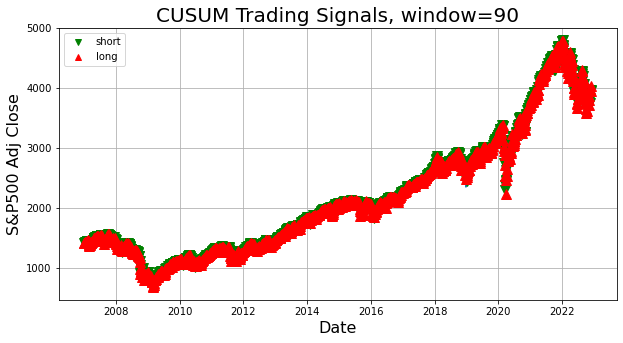

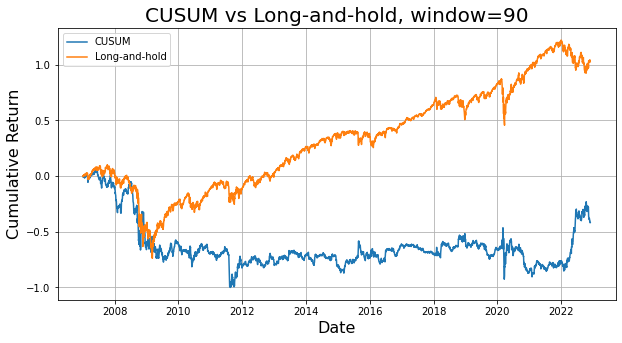

In [164]:
a,b=cusum_strategy(0,90,'^GSPC')

In [165]:
a.shape[0]

4005

In [166]:
a.loc[:,"active"]=b

In [184]:
df2.to_csv('sp500.csv')

In [182]:
a.head()

,Date,Open,High,Low,Close,Adj Close,Volume,return,Action,Direction,mu,sigma,f,Price,active
0,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000,0.001228,long,1,0.001018,0.004545,87.681664,1418.339966,0.000115
1,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000,-0.006103,short,-1,0.001018,0.004545,25.718213,1409.709961,-0.005988
2,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000,0.002218,long,1,0.001018,0.004545,84.770945,1412.839966,-0.008206
3,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000,-0.000517,short,-1,0.001018,0.004545,82.907001,1412.109985,-0.008722
4,2007-01-10,1408.699951,1415.989990,1405.319946,1414.849976,1414.849976,2764660000,0.001938,long,1,0.001018,0.004545,85.994606,1414.849976,-0.010661


In [196]:
df2 = a.copy()
df2['year']=df2['Date'].dt.year
df2['passive']=df2['return'].cumsum()

In [197]:
g = df2.groupby('year')
df=g['passive'].tail(1).to_frame('passive').reset_index(drop=True)

In [199]:
df.loc[:,'active']=g['active'].tail(1).reset_index(drop=True)

In [173]:
df.set_index("year", inplace = True)

In [201]:
df.to_csv('sp500_cum.csv')

[*********************100%***********************]  1 of 1 completed
2007-01-03 Short Signal: Short at {20025.580078125}
2007-01-04 Long Signal: Long at {20211.279296875}
2007-01-08 Short Signal: Short at {19898.080078125}
2007-01-09 Short Signal: Hold at {19568.33984375}
2007-01-10 Long Signal: Long at {19385.369140625}
2007-01-11 Long Signal: Hold at {19613.41015625}
2007-01-15 Long Signal: Hold at {20027.94921875}
2007-01-16 Long Signal: Hold at {20064.5703125}
2007-01-17 Short Signal: Short at {20277.509765625}
2007-01-18 Long Signal: Long at {20327.720703125}
2007-01-22 Short Signal: Short at {20769.69921875}
2007-01-23 Long Signal: Long at {20821.05078125}
2007-01-24 Short Signal: Short at {20669.830078125}
2007-01-25 Short Signal: Hold at {20281.130859375}
2007-01-29 Long Signal: Long at {20460.4609375}
2007-01-30 Short Signal: Short at {20106.419921875}
2007-01-31 Long Signal: Long at {20430.16015625}
2007-02-01 Long Signal: Hold at {20563.6796875}
2007-02-05 Short Signal: Shor

2007-11-21 Long Signal: Long at {26004.919921875}
2007-11-22 Long Signal: Hold at {26541.08984375}
2007-11-26 Long Signal: Hold at {27210.2109375}
2007-11-27 Long Signal: Hold at {27371.240234375}
2007-11-28 Short Signal: Short at {28482.5390625}
2007-11-29 Long Signal: Long at {28643.609375}
2007-12-03 Short Signal: Short at {28879.58984375}
2007-12-04 Short Signal: Hold at {29345.44921875}
2007-12-05 Long Signal: Long at {29558.919921875}
2007-12-06 Short Signal: Short at {28842.470703125}
2007-12-10 Long Signal: Long at {29226.83984375}
2007-12-11 Short Signal: Short at {28521.060546875}
2007-12-12 Short Signal: Hold at {27744.44921875}
2007-12-13 Long Signal: Long at {27563.640625}
2007-12-17 Long Signal: Hold at {26732.869140625}
2007-12-18 Short Signal: Short at {27029.259765625}
2007-12-19 Long Signal: Long at {27017.08984375}
2007-12-20 Short Signal: Short at {27626.919921875}
2007-12-24 Long Signal: Long at {28128.80078125}
2007-12-27 Short Signal: Short at {27370.599609375}
2

2008-10-13 Long Signal: Long at {16832.880859375}
2008-10-14 Short Signal: Short at {15998.2998046875}
2008-10-15 Long Signal: Long at {15230.51953125}
2008-10-16 Long Signal: Hold at {14554.2099609375}
2008-10-20 Long Signal: Hold at {15041.169921875}
2008-10-21 Short Signal: Short at {14266.599609375}
2008-10-22 Long Signal: Long at {13760.490234375}
2008-10-23 Short Signal: Short at {12618.3798828125}
2008-10-27 Short Signal: Hold at {12596.2900390625}
2008-10-28 Long Signal: Long at {12702.0703125}
2008-10-29 Short Signal: Short at {14329.849609375}
2008-10-30 Long Signal: Long at {13968.669921875}
2008-11-03 Long Signal: Hold at {14384.33984375}
2008-11-04 Short Signal: Short at {14840.16015625}
2008-11-05 Short Signal: Hold at {13790.0400390625}
2008-11-06 Long Signal: Long at {14243.4296875}
2008-11-10 Short Signal: Short at {14040.900390625}
2008-11-11 Long Signal: Long at {13939.08984375}
2008-11-12 Short Signal: Short at {13221.349609375}
2008-11-13 Long Signal: Long at {1354

2009-08-13 Long Signal: Hold at {20893.330078125}
2009-08-17 Short Signal: Short at {20306.26953125}
2009-08-18 Short Signal: Hold at {19954.23046875}
2009-08-19 Long Signal: Long at {20328.859375}
2009-08-20 Long Signal: Hold at {20199.01953125}
2009-08-24 Long Signal: Hold at {20435.240234375}
2009-08-25 Long Signal: Hold at {20456.3203125}
2009-08-26 Short Signal: Short at {20242.75}
2009-08-27 Long Signal: Long at {20098.619140625}
2009-08-31 Long Signal: Hold at {19872.30078125}
2009-09-01 Short Signal: Short at {19522.0}
2009-09-02 Long Signal: Long at {19761.6796875}
2009-09-03 Short Signal: Short at {20318.619140625}
2009-09-07 Long Signal: Long at {21069.810546875}
2009-09-08 Long Signal: Hold at {20851.0390625}
2009-09-09 Long Signal: Hold at {21069.560546875}
2009-09-10 Long Signal: Hold at {21161.419921875}
2009-09-14 Short Signal: Short at {20866.369140625}
2009-09-15 Short Signal: Hold at {21402.919921875}
2009-09-16 Long Signal: Long at {21768.509765625}
2009-09-17 Long 

2010-06-28 Short Signal: Short at {20248.900390625}
2010-06-29 Long Signal: Long at {20128.990234375}
2010-07-02 Short Signal: Short at {19905.3203125}
2010-07-05 Long Signal: Long at {20084.119140625}
2010-07-06 Short Signal: Short at {19857.0703125}
2010-07-07 Long Signal: Long at {20050.560546875}
2010-07-08 Short Signal: Short at {20378.66015625}
2010-07-12 Long Signal: Long at {20431.060546875}
2010-07-13 Short Signal: Short at {20560.810546875}
2010-07-14 Short Signal: Hold at {20255.619140625}
2010-07-15 Long Signal: Long at {20250.16015625}
2010-07-19 Short Signal: Short at {20264.58984375}
2010-07-20 Short Signal: Hold at {20487.23046875}
2010-07-21 Long Signal: Long at {20589.69921875}
2010-07-22 Short Signal: Short at {20815.330078125}
2010-07-26 Long Signal: Long at {20973.390625}
2010-07-27 Long Signal: Hold at {21091.1796875}
2010-07-28 Long Signal: Hold at {21093.8203125}
2010-07-29 Short Signal: Short at {21029.810546875}
2010-08-02 Long Signal: Long at {21457.66015625}

2011-05-09 Long Signal: Long at {23336.0}
2011-05-11 Short Signal: Short at {23073.759765625}
2011-05-12 Long Signal: Long at {23276.26953125}
2011-05-16 Long Signal: Hold at {22901.080078125}
2011-05-17 Long Signal: Hold at {23011.140625}
2011-05-18 Short Signal: Short at {23163.380859375}
2011-05-19 Long Signal: Long at {23199.390625}
2011-05-23 Short Signal: Short at {22730.779296875}
2011-05-25 Short Signal: Hold at {22900.7890625}
2011-05-26 Short Signal: Hold at {23118.0703125}
2011-05-30 Short Signal: Hold at {23684.130859375}
2011-05-31 Long Signal: Long at {23626.4296875}
2011-06-01 Short Signal: Short at {23253.83984375}
2011-06-02 Long Signal: Long at {22949.560546875}
2011-06-07 Long Signal: Hold at {22661.630859375}
2011-06-08 Long Signal: Hold at {22609.830078125}
2011-06-09 Short Signal: Short at {22420.369140625}
2011-06-13 Long Signal: Long at {22496.0}
2011-06-14 Short Signal: Short at {22343.76953125}
2011-06-15 Short Signal: Hold at {21953.109375}
2011-06-16 Long Si

2012-03-22 Short Signal: Short at {20668.80078125}
2012-03-26 Short Signal: Hold at {21046.91015625}
2012-03-27 Long Signal: Long at {20885.419921875}
2012-03-28 Short Signal: Short at {20609.390625}
2012-03-29 Long Signal: Long at {20555.580078125}
2012-04-02 Short Signal: Short at {20790.98046875}
2012-04-05 Short Signal: Hold at {20593.0}
2012-04-10 Short Signal: Hold at {20140.669921875}
2012-04-11 Long Signal: Long at {20327.3203125}
2012-04-12 Short Signal: Short at {20701.0390625}
2012-04-16 Long Signal: Long at {20562.310546875}
2012-04-17 Short Signal: Short at {20780.73046875}
2012-04-18 Long Signal: Long at {20995.009765625}
2012-04-19 Long Signal: Hold at {21010.640625}
2012-04-24 Short Signal: Short at {20646.2890625}
2012-04-25 Short Signal: Hold at {20809.7109375}
2012-04-26 Long Signal: Long at {20741.44921875}
2012-04-30 Short Signal: Short at {21094.2109375}
2012-05-02 Long Signal: Long at {21249.529296875}
2012-05-03 Short Signal: Short at {21086.0}
2012-05-07 Long S

2013-01-30 Short Signal: Hold at {23729.529296875}
2013-01-31 Long Signal: Long at {23721.83984375}
2013-02-04 Short Signal: Short at {23148.529296875}
2013-02-05 Long Signal: Long at {23256.9296875}
2013-02-06 Short Signal: Short at {23177.0}
2013-02-07 Long Signal: Long at {23215.16015625}
2013-02-18 Short Signal: Short at {23143.91015625}
2013-02-19 Long Signal: Long at {23307.41015625}
2013-02-20 Short Signal: Short at {22906.669921875}
2013-02-21 Long Signal: Long at {22782.439453125}
2013-02-25 Short Signal: Short at {22519.689453125}
2013-02-26 Long Signal: Long at {22577.009765625}
2013-02-27 Short Signal: Short at {23020.26953125}
2013-02-28 Long Signal: Long at {22880.220703125}
2013-03-04 Long Signal: Hold at {22560.5}
2013-03-05 Short Signal: Short at {22777.83984375}
2013-03-06 Long Signal: Long at {22771.439453125}
2013-03-07 Short Signal: Short at {23091.94921875}
2013-03-11 Long Signal: Long at {22890.599609375}
2013-03-12 Short Signal: Short at {22556.650390625}
2013-0

2013-12-18 Short Signal: Short at {22888.75}
2013-12-19 Long Signal: Long at {22812.1796875}
2013-12-23 Short Signal: Short at {23179.55078125}
2013-12-27 Long Signal: Long at {23243.240234375}
2014-01-02 Short Signal: Short at {22817.279296875}
2014-01-06 Long Signal: Long at {22712.779296875}
2014-01-07 Short Signal: Short at {22996.58984375}
2014-01-08 Short Signal: Hold at {22787.330078125}
2014-01-09 Long Signal: Long at {22846.25}
2014-01-13 Short Signal: Short at {22791.279296875}
2014-01-14 Long Signal: Long at {22902.0}
2014-01-15 Long Signal: Hold at {22986.41015625}
2014-01-16 Short Signal: Short at {23133.349609375}
2014-01-20 Long Signal: Long at {23033.119140625}
2014-01-21 Long Signal: Hold at {23082.25}
2014-01-22 Short Signal: Short at {22733.900390625}
2014-01-23 Long Signal: Long at {22450.060546875}
2014-01-27 Long Signal: Hold at {21960.640625}
2014-01-28 Short Signal: Short at {22141.609375}
2014-01-29 Short Signal: Hold at {22035.419921875}
2014-02-04 Short Signa

2014-11-05 Long Signal: Long at {23649.310546875}
2014-11-06 Short Signal: Short at {23550.240234375}
2014-11-10 Long Signal: Long at {23808.279296875}
2014-11-11 Short Signal: Short at {23938.1796875}
2014-11-12 Long Signal: Long at {24019.939453125}
2014-11-17 Short Signal: Short at {23529.169921875}
2014-11-18 Long Signal: Long at {23373.310546875}
2014-11-19 Long Signal: Hold at {23349.640625}
2014-11-20 Long Signal: Hold at {23437.119140625}
2014-11-24 Short Signal: Short at {23843.91015625}
2014-11-25 Short Signal: Hold at {24111.98046875}
2014-11-26 Long Signal: Long at {24004.279296875}
2014-11-27 Long Signal: Hold at {23987.44921875}
2014-12-01 Short Signal: Short at {23654.30078125}
2014-12-02 Short Signal: Hold at {23428.619140625}
2014-12-03 Short Signal: Hold at {23832.560546875}
2014-12-04 Long Signal: Long at {24002.640625}
2014-12-08 Short Signal: Short at {23485.830078125}
2014-12-09 Long Signal: Long at {23524.51953125}
2014-12-10 Short Signal: Short at {23312.5390625

2015-09-23 Long Signal: Long at {21095.98046875}
2015-09-24 Long Signal: Hold at {21186.3203125}
2015-09-29 Short Signal: Short at {20846.30078125}
2015-10-02 Short Signal: Hold at {21506.08984375}
2015-10-05 Long Signal: Long at {21831.619140625}
2015-10-06 Short Signal: Short at {22515.759765625}
2015-10-07 Long Signal: Long at {22354.91015625}
2015-10-08 Long Signal: Hold at {22458.80078125}
2015-10-12 Short Signal: Short at {22600.4609375}
2015-10-13 Short Signal: Hold at {22439.91015625}
2015-10-14 Short Signal: Hold at {22888.169921875}
2015-10-15 Long Signal: Long at {23067.369140625}
2015-10-22 Short Signal: Short at {23151.939453125}
2015-10-26 Long Signal: Long at {23142.73046875}
2015-10-27 Short Signal: Short at {22956.5703125}
2015-10-28 Long Signal: Long at {22819.939453125}
2015-10-29 Short Signal: Short at {22640.0390625}
2015-11-02 Long Signal: Long at {22568.4296875}
2015-11-03 Short Signal: Short at {23053.5703125}
2015-11-04 Long Signal: Long at {23051.0390625}
2015

2016-08-11 Short Signal: Hold at {22766.91015625}
2016-08-15 Long Signal: Long at {22910.83984375}
2016-08-16 Short Signal: Short at {22799.779296875}
2016-08-17 Short Signal: Hold at {23023.16015625}
2016-08-18 Long Signal: Long at {22937.220703125}
2016-08-22 Long Signal: Hold at {22998.9296875}
2016-08-23 Short Signal: Short at {22820.779296875}
2016-08-24 Long Signal: Long at {22814.94921875}
2016-08-29 Short Signal: Short at {23016.109375}
2016-08-30 Long Signal: Long at {22976.880859375}
2016-08-31 Short Signal: Short at {23162.33984375}
2016-09-01 Long Signal: Long at {23266.69921875}
2016-09-05 Short Signal: Short at {23787.6796875}
2016-09-07 Short Signal: Hold at {23919.33984375}
2016-09-12 Long Signal: Long at {23215.759765625}
2016-09-13 Long Signal: Hold at {23190.640625}
2016-09-14 Short Signal: Short at {23335.58984375}
2016-09-19 Long Signal: Long at {23530.859375}
2016-09-20 Short Signal: Short at {23669.900390625}
2016-09-21 Long Signal: Long at {23759.80078125}
2016-

2017-07-05 Short Signal: Short at {25465.220703125}
2017-07-06 Short Signal: Hold at {25340.849609375}
2017-07-10 Short Signal: Hold at {25877.640625}
2017-07-11 Long Signal: Long at {26043.640625}
2017-07-12 Short Signal: Short at {26346.169921875}
2017-07-13 Long Signal: Long at {26389.23046875}
2017-07-18 Short Signal: Short at {26672.16015625}
2017-07-19 Long Signal: Long at {26740.2109375}
2017-07-20 Short Signal: Short at {26706.08984375}
2017-07-24 Long Signal: Long at {26852.05078125}
2017-07-25 Long Signal: Hold at {26941.01953125}
2017-07-26 Short Signal: Short at {27131.169921875}
2017-07-27 Short Signal: Hold at {26979.390625}
2017-07-31 Long Signal: Long at {27540.23046875}
2017-08-01 Long Signal: Hold at {27607.380859375}
2017-08-02 Short Signal: Short at {27531.009765625}
2017-08-03 Long Signal: Long at {27562.6796875}
2017-08-07 Short Signal: Short at {27854.91015625}
2017-08-08 Short Signal: Hold at {27757.08984375}
2017-08-09 Short Signal: Hold at {27444.0}
2017-08-10

2018-05-24 Short Signal: Short at {30588.0390625}
2018-05-28 Short Signal: Hold at {30484.580078125}
2018-05-29 Short Signal: Hold at {30056.7890625}
2018-05-30 Long Signal: Long at {30468.560546875}
2018-05-31 Long Signal: Hold at {30492.91015625}
2018-06-05 Short Signal: Short at {31259.099609375}
2018-06-06 Short Signal: Hold at {31512.630859375}
2018-06-07 Short Signal: Hold at {30958.2109375}
2018-06-11 Long Signal: Long at {31103.060546875}
2018-06-12 Short Signal: Short at {30725.150390625}
2018-06-13 Long Signal: Long at {30440.169921875}
2018-06-14 Long Signal: Hold at {30309.490234375}
2018-06-19 Long Signal: Hold at {29696.169921875}
2018-06-20 Short Signal: Short at {29296.05078125}
2018-06-21 Long Signal: Long at {29338.69921875}
2018-06-25 Short Signal: Short at {28881.400390625}
2018-06-26 Short Signal: Hold at {28356.259765625}
2018-06-27 Long Signal: Long at {28497.3203125}
2018-06-28 Short Signal: Short at {28955.109375}
2018-07-03 Long Signal: Long at {28241.66992187

2019-04-09 Short Signal: Short at {30119.560546875}
2019-04-10 Short Signal: Hold at {29839.44921875}
2019-04-11 Long Signal: Long at {29909.759765625}
2019-04-15 Short Signal: Short at {30129.869140625}
2019-04-16 Long Signal: Long at {30124.6796875}
2019-04-17 Short Signal: Short at {29963.259765625}
2019-04-23 Long Signal: Long at {29805.830078125}
2019-04-24 Short Signal: Short at {29549.80078125}
2019-04-25 Long Signal: Long at {29605.009765625}
2019-04-29 Short Signal: Short at {29699.109375}
2019-05-02 Long Signal: Long at {30081.55078125}
2019-05-06 Short Signal: Short at {29363.01953125}
2019-05-07 Short Signal: Hold at {29003.19921875}
2019-05-08 Short Signal: Hold at {28311.0703125}
2019-05-09 Long Signal: Long at {28550.240234375}
2019-05-14 Long Signal: Hold at {28268.7109375}
2019-05-15 Long Signal: Hold at {28275.0703125}
2019-05-16 Short Signal: Short at {27946.4609375}
2019-05-20 Long Signal: Long at {27657.240234375}
2019-05-21 Long Signal: Hold at {27705.939453125}
2

2020-02-24 Long Signal: Long at {26893.23046875}
2020-02-25 Short Signal: Short at {26696.490234375}
2020-02-26 Long Signal: Long at {26778.619140625}
2020-02-27 Short Signal: Short at {26129.9296875}
2020-03-02 Long Signal: Long at {26284.8203125}
2020-03-03 Short Signal: Short at {26222.0703125}
2020-03-04 Short Signal: Hold at {26767.869140625}
2020-03-05 Short Signal: Hold at {26146.669921875}
2020-03-09 Long Signal: Long at {25392.509765625}
2020-03-10 Long Signal: Hold at {25231.609375}
2020-03-11 Short Signal: Short at {24309.0703125}
2020-03-12 Long Signal: Long at {24032.91015625}
2020-03-16 Long Signal: Hold at {23263.73046875}
2020-03-17 Short Signal: Short at {22291.8203125}
2020-03-18 Long Signal: Long at {21709.130859375}
2020-03-19 Short Signal: Short at {22805.0703125}
2020-03-23 Long Signal: Long at {22663.490234375}
2020-03-24 Long Signal: Hold at {23527.189453125}
2020-03-25 Long Signal: Hold at {23352.33984375}
2020-03-26 Long Signal: Hold at {23484.279296875}
2020-

2021-01-04 Short Signal: Short at {27649.859375}
2021-01-05 Long Signal: Long at {27692.30078125}
2021-01-06 Short Signal: Short at {27548.51953125}
2021-01-07 Short Signal: Hold at {27878.220703125}
2021-01-11 Short Signal: Hold at {28276.75}
2021-01-12 Long Signal: Long at {28235.599609375}
2021-01-13 Short Signal: Short at {28496.859375}
2021-01-14 Long Signal: Long at {28573.859375}
2021-01-18 Short Signal: Short at {29642.279296875}
2021-01-19 Long Signal: Long at {29962.470703125}
2021-01-20 Long Signal: Hold at {29927.759765625}
2021-01-21 Short Signal: Short at {29447.849609375}
2021-01-25 Short Signal: Hold at {29391.259765625}
2021-01-26 Long Signal: Long at {29297.529296875}
2021-01-27 Short Signal: Short at {28550.76953125}
2021-01-28 Long Signal: Long at {28283.7109375}
2021-02-01 Long Signal: Hold at {29248.69921875}
2021-02-02 Long Signal: Hold at {29307.4609375}
2021-02-03 Short Signal: Short at {29113.5}
2021-02-04 Long Signal: Long at {29288.6796875}
2021-02-08 Long S

2021-11-16 Long Signal: Long at {25650.080078125}
2021-11-17 Short Signal: Short at {25319.720703125}
2021-11-18 Long Signal: Long at {25049.970703125}
2021-11-22 Short Signal: Short at {24651.580078125}
2021-11-23 Long Signal: Long at {24685.5}
2021-11-25 Short Signal: Short at {24080.51953125}
2021-11-29 Long Signal: Long at {23475.259765625}
2021-11-30 Long Signal: Hold at {23658.919921875}
2021-12-01 Long Signal: Hold at {23788.9296875}
2021-12-02 Long Signal: Hold at {23766.689453125}
2021-12-06 Short Signal: Short at {23983.66015625}
2021-12-07 Long Signal: Long at {23996.869140625}
2021-12-08 Short Signal: Short at {24254.859375}
2021-12-09 Short Signal: Hold at {23995.720703125}
2021-12-13 Short Signal: Hold at {23635.94921875}
2021-12-14 Long Signal: Long at {23420.759765625}
2021-12-15 Long Signal: Hold at {23475.5}
2021-12-16 Short Signal: Short at {23192.630859375}
2021-12-20 Long Signal: Long at {22971.330078125}
2021-12-21 Long Signal: Hold at {23102.330078125}
2021-12-22

2022-09-27 Short Signal: Short at {17250.880859375}
2022-09-28 Long Signal: Long at {17165.869140625}
2022-09-29 Long Signal: Hold at {17222.830078125}
2022-10-03 Short Signal: Short at {17079.509765625}
2022-10-05 Long Signal: Long at {18012.150390625}
2022-10-06 Short Signal: Short at {17740.05078125}
2022-10-10 Short Signal: Hold at {16832.359375}
2022-10-11 Long Signal: Long at {16701.029296875}
2022-10-12 Short Signal: Short at {16389.109375}
2022-10-13 Long Signal: Long at {16587.689453125}
2022-10-17 Short Signal: Short at {16914.580078125}
2022-10-18 Short Signal: Hold at {16511.279296875}
2022-10-19 Long Signal: Long at {16280.2197265625}
2022-10-20 Long Signal: Hold at {16211.1201171875}
2022-10-24 Long Signal: Hold at {15165.58984375}
2022-10-25 Short Signal: Short at {15317.669921875}
2022-10-26 Long Signal: Long at {15427.9404296875}
2022-10-27 Short Signal: Short at {14863.0595703125}
2022-10-31 Short Signal: Hold at {15455.26953125}
2022-11-01 Long Signal: Long at {15827

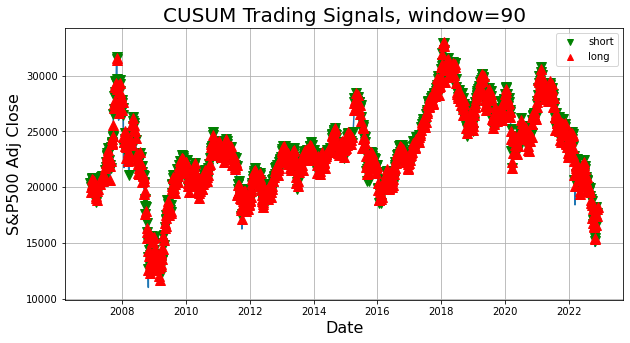

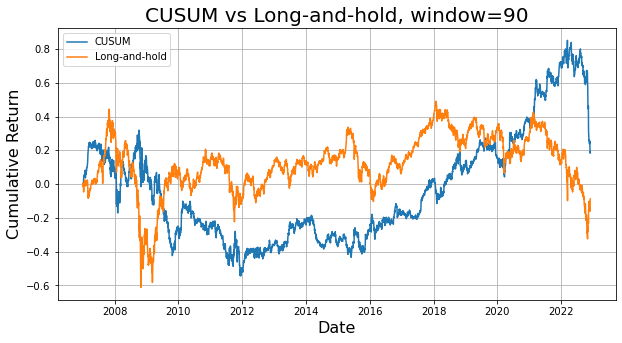

In [226]:
c,d=cusum_strategy(0,90,'^HSI')

In [228]:
c.loc[:,"active"]=d

In [235]:
df3 = c.copy()
df3['year']=df3['Date'].dt.year
df3['passive']=df3['return'].cumsum()

In [236]:
f = df3.groupby('year')
df_hsi=f['passive'].tail(1).to_frame('passive').reset_index(drop=True)

In [238]:
df_hsi.loc[:,'active']=f['active'].tail(1).reset_index(drop=True)
#df_hsi.set_index("year", inplace = True)
df_hsi.to_csv('hsi_cum.csv')

[*********************100%***********************]  1 of 1 completed
2022-09-06 Short Signal: Short at {19044.30078125}
2022-09-07 Short Signal: Hold at {18854.619140625}
2022-09-08 Short Signal: Hold at {19362.25}
2022-09-13 Long Signal: Long at {18847.099609375}
2022-09-14 Long Signal: Hold at {18930.380859375}
2022-09-15 Short Signal: Short at {18761.689453125}
2022-09-19 Short Signal: Hold at {18781.419921875}
2022-09-20 Short Signal: Hold at {18444.619140625}
2022-09-21 Long Signal: Long at {18147.94921875}
2022-09-22 Long Signal: Hold at {17933.26953125}
2022-09-26 Long Signal: Hold at {17860.310546875}
2022-09-27 Short Signal: Short at {17250.880859375}
2022-09-28 Long Signal: Long at {17165.869140625}
2022-10-03 Short Signal: Short at {17079.509765625}
2022-10-05 Long Signal: Long at {18012.150390625}
2022-10-06 Short Signal: Short at {17740.05078125}
2022-10-10 Short Signal: Hold at {16832.359375}
2022-10-11 Long Signal: Long at {16701.029296875}
2022-10-12 Short Signal: Short

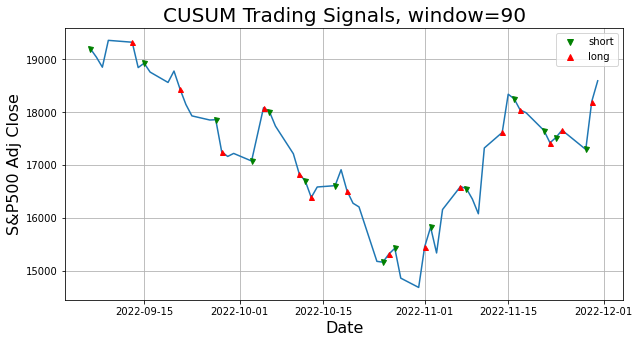

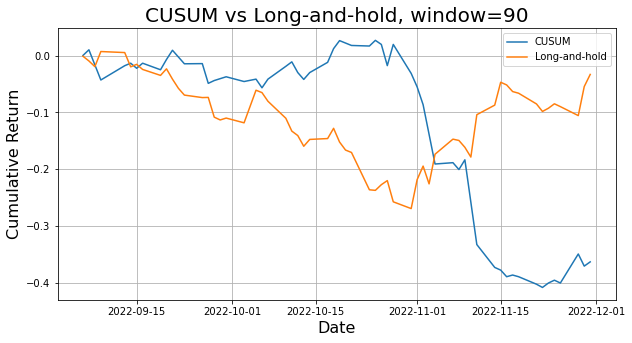

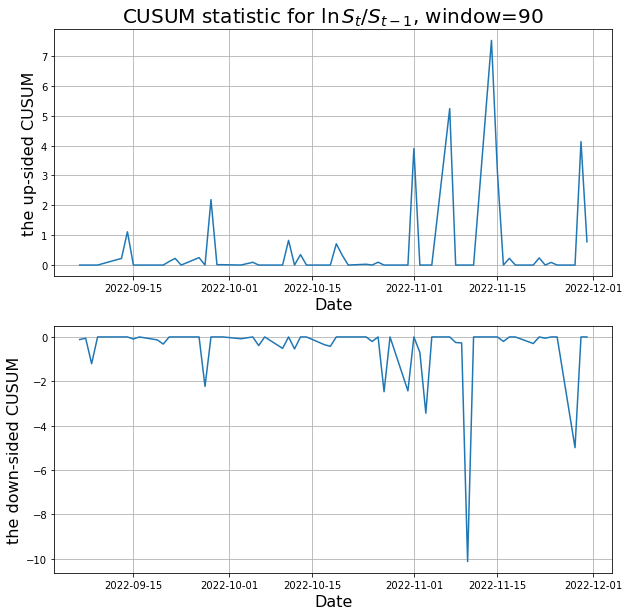

In [290]:
x,y=cusum_strategy(60,90,'^HSI')

In [291]:
y

[0.00011577778392367891,
 0.010125731885102343,
 -0.016441631095830085,
 -0.043008994076762515,
 -0.01787222336898598,
 -0.013463174174585542,
 -0.02241426288763105,
 -0.013463174174585542,
 -0.025000880298904245,
 -0.006905483638524397,
 0.009309635192163872,
 -0.002590307675974908,
 -0.014490250544113688,
 -0.014200744364492375,
 -0.04891850101939877,
 -0.04397835462888534,
 -0.04066558090454809,
 -0.03735280718021084,
 -0.045709155297533395,
 -0.041508591881758046,
 -0.05673030434911642,
 -0.041508591881758046,
 -0.018934250158890616,
 -0.011101415197261384,
 -0.029954715521064552,
 -0.041998484810512944,
 -0.029954715521064552,
 -0.011958264527549896,
 0.01217397087037863,
 0.0262668547822199,
 0.02201343132328059,
 0.01776000786434128,
 0.016764789534594475,
 0.026742812952168397,
 0.019569692668032095,
 -0.017731575369784987,
 0.019569692668032095,
 -0.03141624390505083,
 -0.055194307224510804,
 -0.08649182146937473,
 -0.13867083062403462,
 -0.19084983977869452,
 -0.1885212800793